# 3 - Plotting fields in Tokamak geometry

In this tutorial we will learn how to plot FEEC data in poloidal planes of a Tokamak geometry. 

The Struphy run generating the data for this tutorial can be launched via:

    $ struphy test tutorials -n 3
    
All data generated in this way is stored in the Struphy installation path (obtained from ``struphy -p``) under ``io/out/tutorial_03``.

## Time, logical and physical grids

Let us start by inspecting the content of the `post_processing/` folder, see [Tutorial 2](https://struphy.pages.mpcdf.de/struphy/doc/_build/html/tutorials/tutorial_02_postproc_standard_plotting.html):

In [1]:
import os
import struphy

path_out = os.path.join(struphy.__path__[0], 'io/out/', 'sim_Stokes_mf')   #_10x10_10steps
data_path = os.path.join(path_out, 'post_processing')
fluid_path = os.path.join(data_path, 'fields_data' )
params_path = os.path.join(path_out, 'parameters.yml')

import yaml

with open(params_path) as file:
    parameters = yaml.load(file, Loader=yaml.FullLoader)

Since this was a run of the model `LinearMHD`, only `fields_data/` is present in the output. Let us get the time grid,

In [2]:
import numpy as np

t_grid = np.load(os.path.join(data_path, 't_grid.npy'))


In [3]:
import pickle
with open(os.path.join(fluid_path, 'grids_phy.bin'), 'rb') as file:
    x_grid, y_grid, z_grid = pickle.load(file)
    
with open(os.path.join(fluid_path, 'grids_log.bin'), 'rb') as file:
    e1_grid, e2_grid, e3_grid = pickle.load(file)
    

## Load data and print initial conditions

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

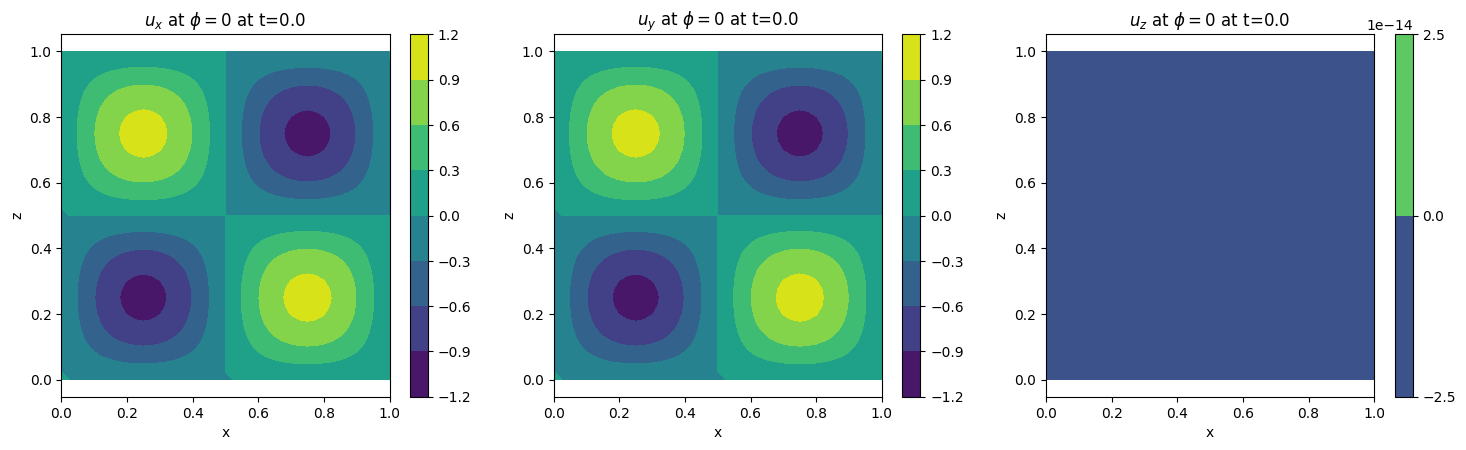

In [4]:
with open(os.path.join(fluid_path, 'mhd/', 'u_phy.bin'), 'rb') as file:
    u_phy = pickle.load(file)
    
with open(os.path.join(fluid_path, 'mhd/', 'ue_phy.bin'), 'rb') as file:
    ue_phy = pickle.load(file)
    
with open(os.path.join(fluid_path, 'mhd/', 'potential_phy.bin'), 'rb') as file:
    potential_phy = pickle.load(file)
    

from matplotlib import pyplot as plt
plt.figure(figsize=(18, 16))
#u_analyt
plt.subplot(3, 3, 1)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], u_phy[0.0][0][:, :, 0])
plt.colorbar()
plt.title(f'$u_x$ at $\phi=0$ at t=0.0')
plt.xlabel('x')
plt.ylabel('z')
plt.axis('equal')

# u_xyz
plt.subplot(3, 3, 2)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], u_phy[0.0][0][:, :, 0])
plt.colorbar()
plt.title(f'$u_y$ at $\phi=0$ at t=0.0')
plt.xlabel('x')
plt.ylabel('z')
plt.axis('equal')

# u_RZphi
plt.subplot(3, 3, 3)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], u_phy[0.0][2][:, :, 0])
plt.colorbar()
plt.title(f'$u_z$ at $\phi=0$ at t=0.0')
plt.xlabel('x')
plt.ylabel('z')
plt.axis('equal')

## Manufactured Solution

The manufactured solution for the velocity of the ions is given by: 



   $ \left[\begin{array}{c} u_x \\ u_y \\ u_z \end{array} \right] =  \left[\begin{array}{c} -sin(2\pi x)sin(2\pi y) \\ -cos(2\pi x)cos(2\pi y) \\ 0 \end{array} \right]  \,,$

the manufactured solution for the velocity of the electrons is given by: 


   $ \left[\begin{array}{c} u_{ex} \\ u_{ey} \\ u_{ez} \end{array} \right] =  \left[\begin{array}{c} -sin(4\pi x)sin(4\pi y) \\ -cos(4\pi x)cos(4\pi y) \\ 0 \end{array} \right]  \,,$

the manufactured solution for the potential is given by:\
    $ \phi = cos(2\pi x)+sin(2\pi y) \,.$

The resulting forceterm $f$ on the right hand side is given by:\
    $ \left[\begin{array}{c} f_x \\ f_y \\ f_z \end{array} \right] =  \left[\begin{array}{c} -2\pi sin(2\pi x) + B_0 cos(2\pi x)cos(2\pi y) - \nu 8 \pi^2 sin(2\pi x)sin(2\pi y) \\ 2\pi cos(2\pi y) - B_0 sin(2\pi x)sin(2\pi y) - \nu 8 \pi^2 cos(2\pi x)cos(2\pi y) \\ 0 \end{array} \right]  \,,$

the resulting forceterm $f_e$ on the right hand side is given by:\
    $ \left[\begin{array}{c} f_{ex} \\ f_{ey} \\ f_{ez} \end{array} \right] =  \left[\begin{array}{c} 2\pi sin(2\pi x) -B_0 cos(4\pi x)cos(4\pi y) - \nu_e 32 \pi^2 sin(4\pi x)sin(4\pi y) \\ -2\pi cos(2\pi y) +B_0 sin(4\pi x)sin(4\pi y) - \nu_e 32 \pi^2 cos(4\pi x)cos(4\pi y) \\ 0 \end{array} \right]  \,.$

In [5]:
# Manufactured solution
uanalyt0 = -np.sin(2*np.pi*x_grid)*np.sin(2*np.pi*y_grid)
uanalyt1 = -np.cos(2*np.pi*x_grid)*np.cos(2*np.pi*y_grid)
uanalyt2 = 0.0*x_grid
u_eanalyt0 = -np.sin(4*np.pi*x_grid)*np.sin(4*np.pi*y_grid)
u_eanalyt1 = -np.cos(4*np.pi*x_grid)*np.cos(4*np.pi*y_grid)
u_eanalyt2 = 0.0*x_grid
uanalyt = [uanalyt0, uanalyt1, uanalyt2]
u_eanalyt = [u_eanalyt0, u_eanalyt1, u_eanalyt2]
potential_analytical = [np.cos(2*np.pi*x_grid)+np.sin(2*np.pi*y_grid)]

b0 =  parameters['fluid']['mhd']['options']['Stokes']['B0']
nu =  parameters['fluid']['mhd']['options']['Stokes']['nu']
nu_e =  parameters['fluid']['mhd']['options']['Stokes']['nu_e']
Nel =  parameters['grid']['Nel']
p =  parameters['grid']['p']
spl_kind =  parameters['grid']['spl_kind']

F1analyticx = -2.0*np.pi*np.sin(2*np.pi*x_grid)+np.cos(2*np.pi*x_grid)*np.cos(2*np.pi*y_grid)*b0-nu*8.0*np.pi**2*np.sin(2*np.pi*x_grid)*np.sin(2*np.pi*y_grid)
F1analyticy = 2.0*np.pi*np.cos(2*np.pi*y_grid)-np.sin(2*np.pi*x_grid)*np.sin(2*np.pi*y_grid)*b0-nu*8.0*np.pi**2*np.cos(2*np.pi*x_grid)*np.cos(2*np.pi*y_grid)
F1analytic = [F1analyticx, F1analyticy, 0*x_grid]  

F2analyticx = 2.0*np.pi*np.sin(2*np.pi*x_grid)-np.cos(4*np.pi*x_grid)*np.cos(4*np.pi*y_grid)*b0-nu_e*32.0*np.pi**2*np.sin(4*np.pi*x_grid)*np.sin(4*np.pi*y_grid)
F2analyticy = -2.0*np.pi*np.cos(2*np.pi*y_grid)+np.sin(4*np.pi*x_grid)*np.sin(4*np.pi*y_grid)*b0-nu_e*32.0*np.pi**2*np.cos(4*np.pi*x_grid)*np.cos(4*np.pi*y_grid)
F2analytic = [F2analyticx, F2analyticy, 0*x_grid]    


## Initial conditions: comparison scheme with manufactured solution

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

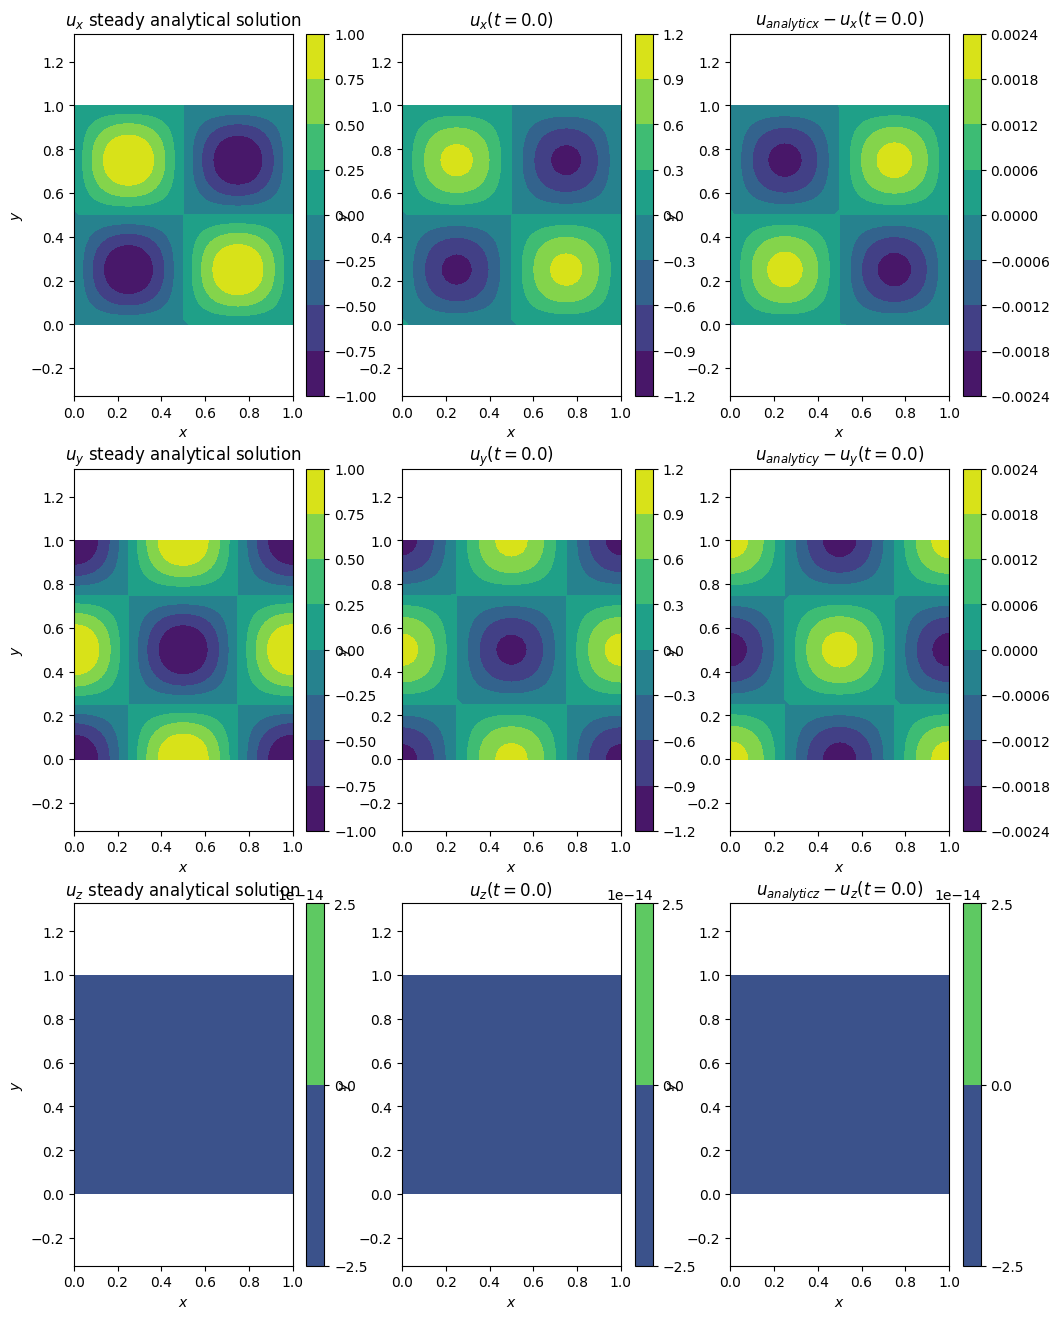

In [6]:
### ion velocity u

plt.figure(figsize=(12, 16))

plt.subplot(3, 3, 1)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], uanalyt[0][:, :, 0])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(f'$u_x$ steady analytical solution')
plt.colorbar()
plt.axis('equal')
plt.subplot(3, 3, 2)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], u_phy[0.0][0][:, :, 0])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(f'$u_x(t=0.0)$')
plt.colorbar()
plt.axis('equal')
plt.subplot(3, 3, 3)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], uanalyt[0][:, :, 0]-u_phy[0.0][0][:, :, 0])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(r'$u_{analyticx}-u_x(t=0.0)$')
plt.colorbar()
plt.axis('equal')

plt.subplot(3, 3, 4)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], uanalyt[1][:, :, 0])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(f'$u_y$ steady analytical solution')
plt.colorbar()
plt.axis('equal')
plt.subplot(3, 3, 5)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], u_phy[0.0][1][:, :, 0])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(f'$u_y(t=0.0)$')
plt.colorbar()
plt.axis('equal')
plt.subplot(3, 3, 6)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], uanalyt[1][:, :, 0]-u_phy[0.0][1][:, :, 0])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(r'$u_{analyticy}-u_y(t=0.0)$')
plt.colorbar()
plt.axis('equal')

plt.subplot(3, 3, 7)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], uanalyt[2][:, :, 0])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(f'$u_z$ steady analytical solution')
plt.colorbar()
plt.axis('equal')
plt.subplot(3, 3, 8)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], u_phy[0.0][2][:, :, 0])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(f'$u_z(t=0.0)$')
plt.colorbar()
plt.axis('equal')
plt.subplot(3, 3, 9)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], uanalyt[2][:, :, 0]-u_phy[0.0][2][:, :, 0])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(r'$u_{analyticz}-u_z(t=0.0)$')
plt.colorbar()
plt.axis('equal')



## Electron velocity $u_e$

Comparison of analytic solution and manufactured solution

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

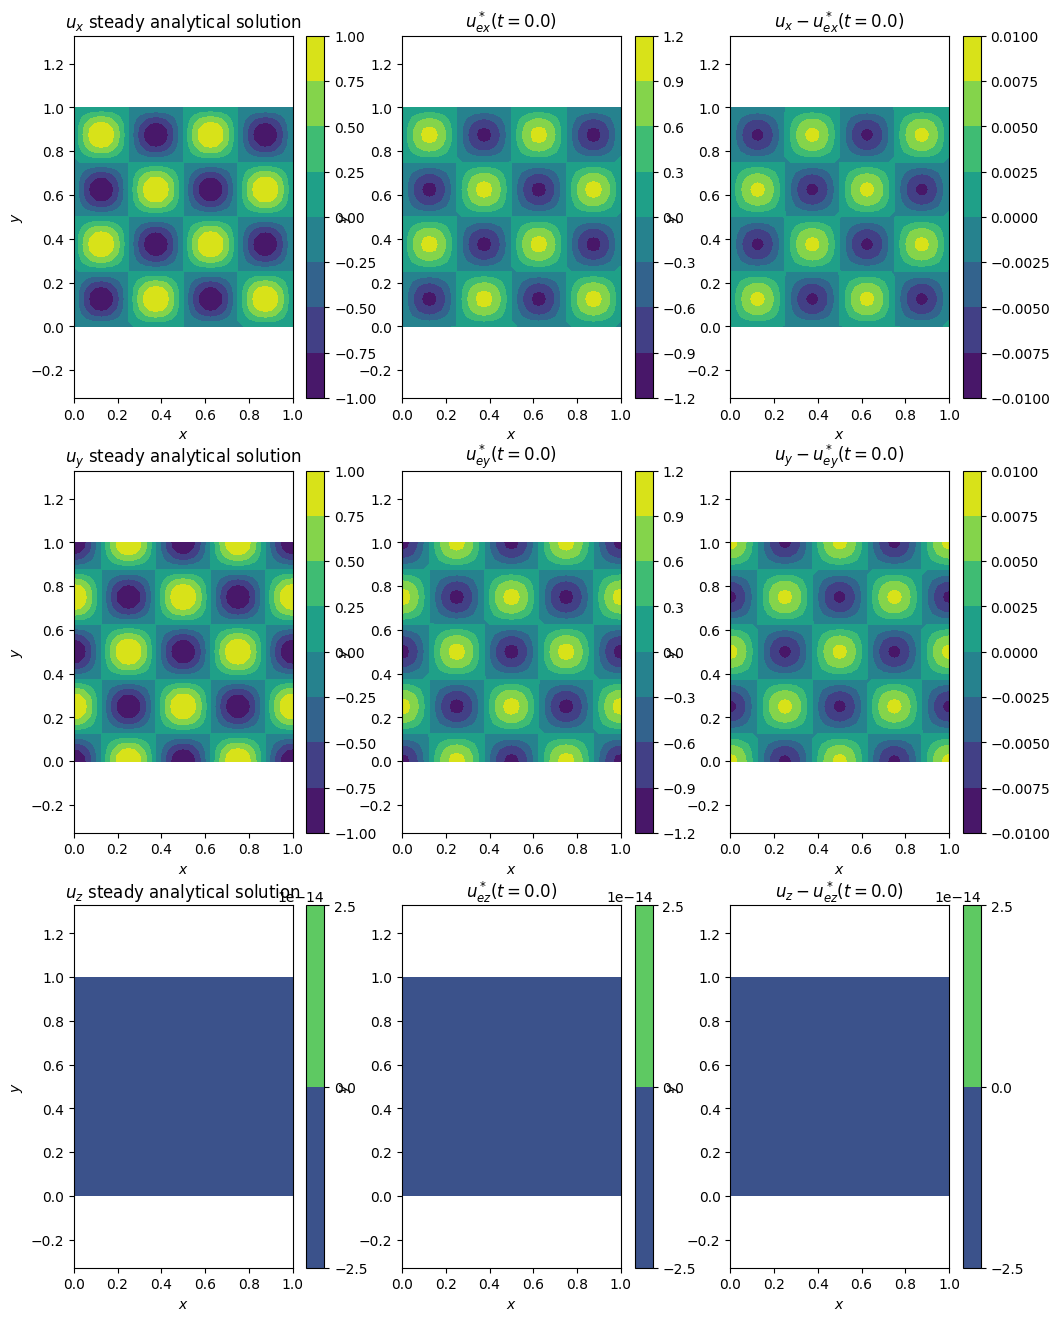

In [7]:
### electron velocity ue

plt.figure(figsize=(12, 16))

plt.subplot(3, 3, 1)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], u_eanalyt[0][:, :, 0])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(f'$u_x$ steady analytical solution')
plt.colorbar()
plt.axis('equal')
plt.subplot(3, 3, 2)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], ue_phy[0.0][0][:, :, 0])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(r'$u_{ex}^*(t=0.0)$')
plt.colorbar()
plt.axis('equal')
plt.subplot(3, 3, 3)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], u_eanalyt[0][:, :, 0]-ue_phy[0.0][0][:, :, 0])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(r'$u_x-u_{ex}^*(t=0.0)$')
plt.colorbar()
plt.axis('equal')

plt.subplot(3, 3, 4)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], u_eanalyt[1][:, :, 0])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(f'$u_y$ steady analytical solution')
plt.colorbar()
plt.axis('equal')
plt.subplot(3, 3, 5)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], ue_phy[0.0][1][:, :, 0])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(r'$u_{ey}^*(t=0.0)$')
plt.colorbar()
plt.axis('equal')
plt.subplot(3, 3, 6)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], u_eanalyt[1][:, :, 0]-ue_phy[0.0][1][:, :, 0])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(r'$u_y - u_{ey}^* (t=0.0)$')
plt.colorbar()
plt.axis('equal')

plt.subplot(3, 3, 7)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], u_eanalyt[2][:, :, 0])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(f'$u_z$ steady analytical solution')
plt.colorbar()
plt.axis('equal')
plt.subplot(3, 3, 8)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], ue_phy[0.0][2][:, :, 0])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(r'$u_{ez}^*(t=0.0)$')
plt.colorbar()
plt.axis('equal')
plt.subplot(3, 3, 9)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], u_eanalyt[2][:, :, 0]-ue_phy[0.0][2][:, :, 0])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(r'$u_z - u_{ez}^*(t=0.0)$')
plt.colorbar()
plt.axis('equal')

## Potential

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

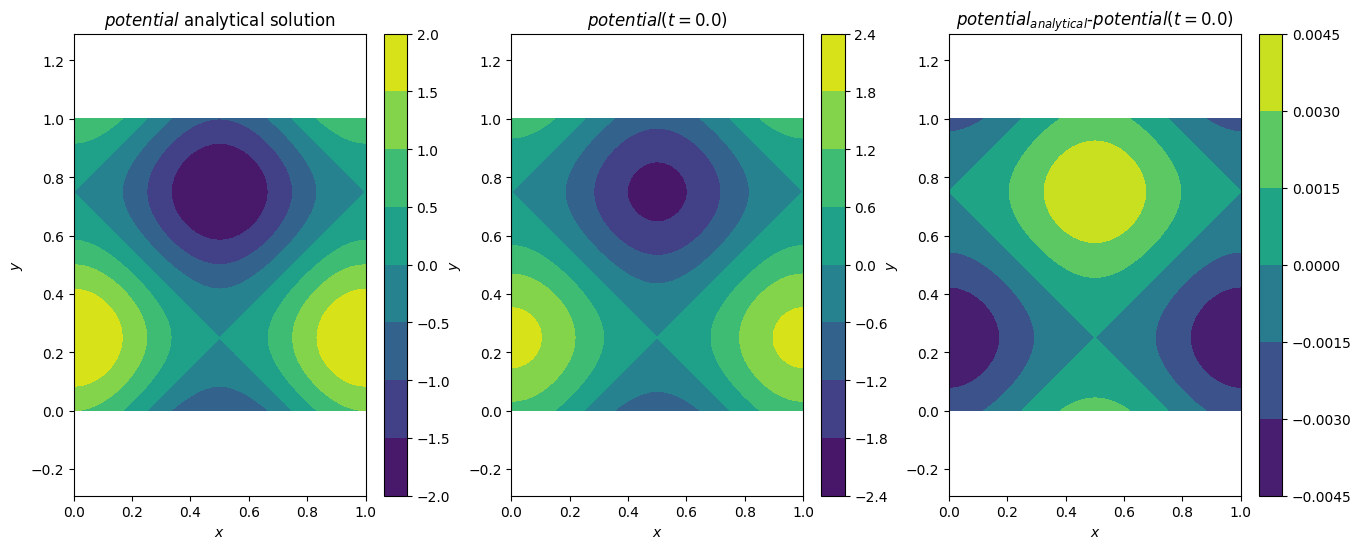

In [8]:
### Potential

plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], potential_analytical[0][:, :, 0])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(f'$potential$ analytical solution')
plt.colorbar()
plt.axis('equal')
plt.subplot(1, 3, 2)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], potential_phy[0.0][0][:, :, 0])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(f'$potential(t=0.0)$')
plt.colorbar()
plt.axis('equal')
plt.subplot(1, 3, 3)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], potential_analytical[0][:, :, 0]-potential_phy[0.0][0][:, :, 0])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(r'$potential_{analytical}$-'f'$potential(t=0.0)$')
plt.colorbar()
plt.axis('equal')


## Time evolution

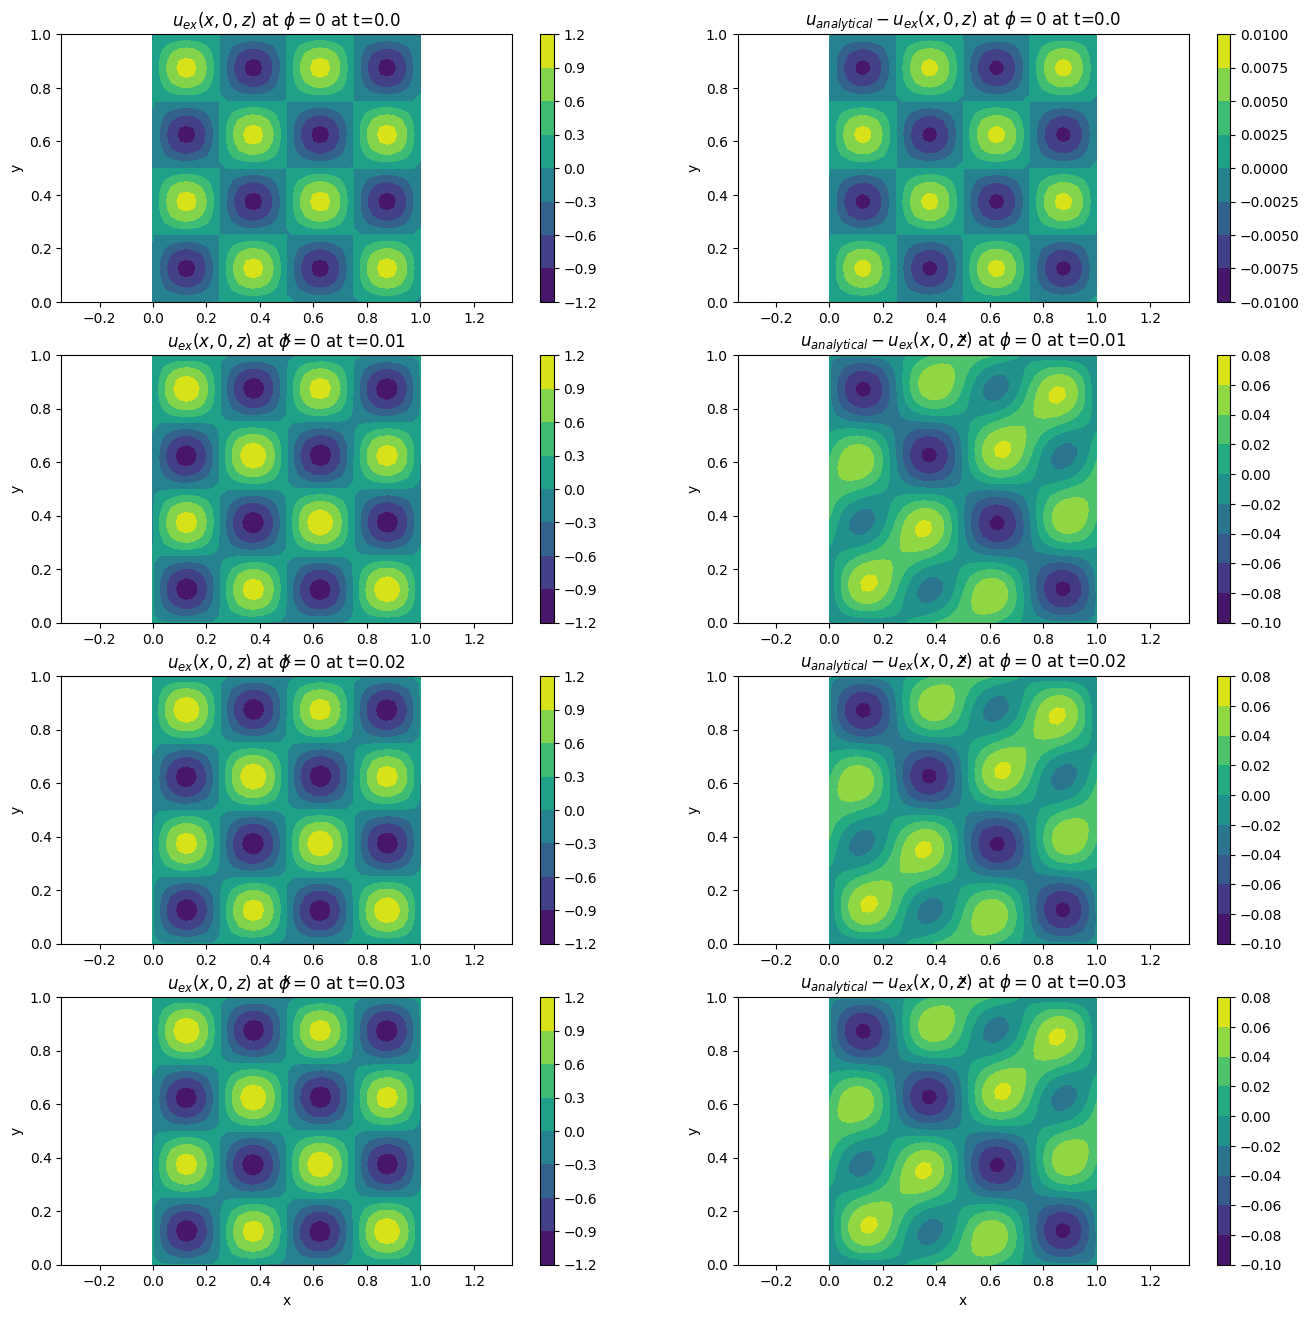

In [9]:
if len(u_phy)>= 1000: 
    plt.figure(figsize=(32, 55))
    
    for n, (t, u_comps) in enumerate(ue_phy.items()): 
        # u_xyz
        if n%100 == 0:
            plt.subplot(22, 2, 2*n//100+1)
            plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], u_comps[0][:, :, 0])
            plt.colorbar()
            plt.title(r'$ u_{ex}(x, 0, z)$ ' f'at $\phi=0$ at t={t}')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.axis('equal')
            
            plt.subplot(22, 2, 2*n//100+2)
            plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], u_eanalyt[0][:,:,0]-u_comps[0][:, :, 0])
            plt.colorbar()
            plt.title(r'$u_{analytical}- u_{ex}(x, 0, z)$ at $\phi=0$ at' f' t={t}')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.axis('equal')
        
elif len(u_phy)>=100:
    plt.figure(figsize=(32, 55))
    for n, (t, u_comps) in enumerate(ue_phy.items()): 
        # u_xyz
        if n%10 == 0:
            plt.subplot(22, 2, 2*n//10+1)
            plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], u_comps[0][:, :, 0])
            plt.colorbar()
            plt.title(r'$ u_{ex}(x, 0, z)$ ' f'at $\phi=0$ at t={t}')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.axis('equal')
            
            plt.subplot(22, 2, 2*n//10+2)
            plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], u_eanalyt[0][:,:,0]-u_comps[0][:, :, 0])
            plt.colorbar()
            plt.title(r'$u_{analytical}- u_{ex}(x, 0, z)$ at $\phi=0$ at' f' t={t}')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.axis('equal')
        
elif len(u_phy)>=20:
    plt.figure(figsize=(16, 66))
    for n, (t, u_comps) in enumerate(ue_phy.items()): 
        # u_xyz
        if n%2 == 0:
            plt.subplot(26, 2, 2*n//2+1)
            plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], u_comps[0][:, :, 0])
            plt.colorbar()
            plt.title(r'$ u_{ex}(x, 0, z)$ ' f'at $\phi=0$ at t={t}')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.axis('equal')
            
            plt.subplot(26, 2, 2*n//2+2)
            plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], u_eanalyt[0][:,:,0]-u_comps[0][:, :, 0])
            plt.colorbar()
            plt.title(r'$u_{analytical}- u_{ex}(x, 0, z)$ at $\phi=0$ at' f' t={t}')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.axis('equal')
        
else:
    plt.figure(figsize=(16, 66))
    for n, (t, u_comps) in enumerate(ue_phy.items()): 
        # u_xyz
        plt.subplot(16, 2, 2*n+1)
        plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], u_comps[0][:, :, 0])
        plt.colorbar()
        plt.title(r'$ u_{ex}(x, 0, z)$ ' f'at $\phi=0$ at t={t}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.axis('equal')
        
        plt.subplot(16, 2, 2*n+2)
        plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], u_eanalyt[0][:,:,0]-u_comps[0][:, :, 0])
        plt.colorbar()
        plt.title(r'$u_{analytical}- u_{ex}(x, 0, z)$ at $\phi=0$ at' f' t={t}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.axis('equal')


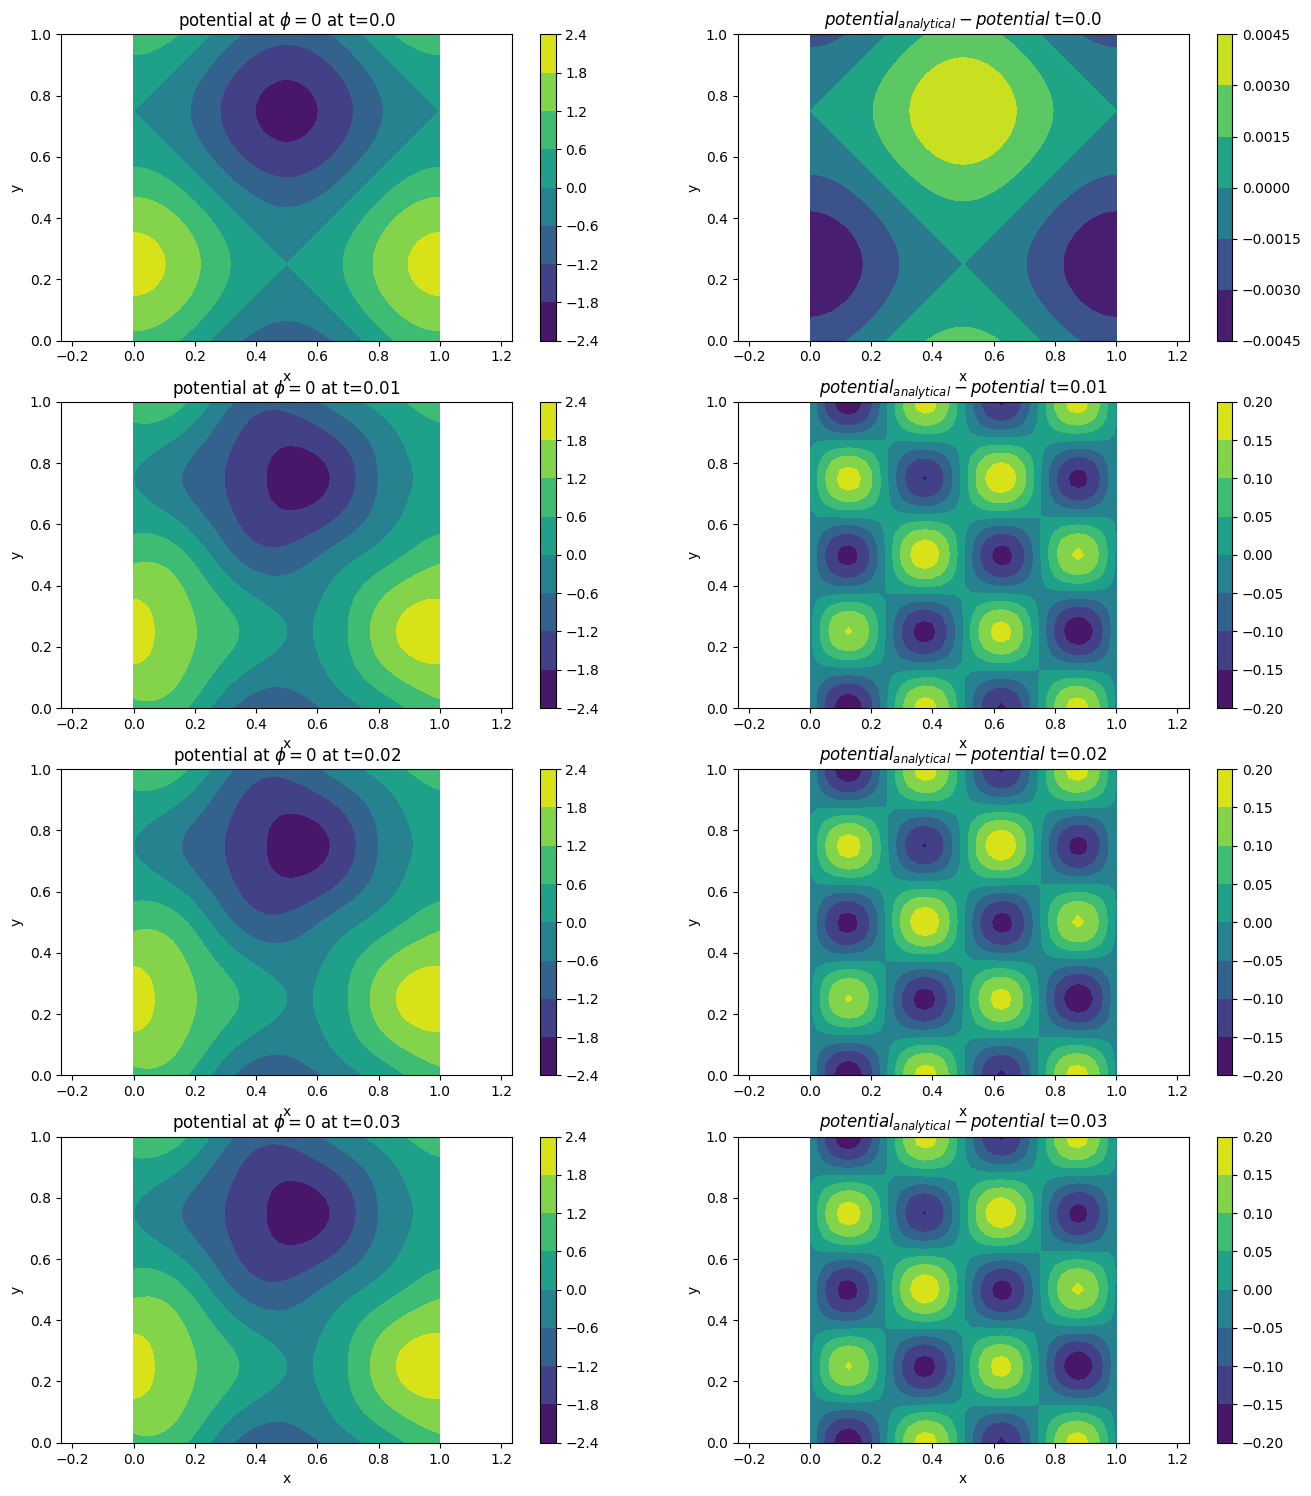

In [10]:
if len(u_phy)>= 1000: 
    plt.figure(figsize=(32, 55))
    for n, (t, u_comps) in enumerate(potential_phy.items()): 
        # u_xyz
        if n%100 == 0:
            plt.subplot(22, 2, 2*n//100+1)
            plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], u_comps[0][:, :, 0])
            plt.colorbar()
            plt.title(f'potential t={t}')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.axis('equal')
            
            plt.subplot(22, 2, 2*n//100+2)
            plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], potential_analytical[0][:, :, 0]-u_comps[0][:, :, 0])
            plt.colorbar()
            plt.title(r'$potential_{analytical}-potential$'f' t={t}')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.axis('equal')
        
elif len(u_phy)>=100:
    plt.figure(figsize=(32, 55))
    for n, (t, u_comps) in enumerate(potential_phy.items()): 
        # u_xyz
        if n%10 == 0:
            plt.subplot(22, 2, 2*n//10+1)
            plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], u_comps[0][:, :, 0])
            plt.colorbar()
            plt.title(f'potential at $\phi=0$ at t={t}')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.axis('equal')
            
            plt.subplot(22, 2, 2*n//10+2)
            plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], potential_analytical[0][:, :, 0]-u_comps[0][:, :, 0])
            plt.colorbar()
            plt.title(r'$potential_{analytical}-potential$'f' t={t}')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.axis('equal')
        
elif len(u_phy)>=20:
    plt.figure(figsize=(16, 66))
    for n, (t, u_comps) in enumerate(potential_phy.items()): 
        # u_xyz
        if n%2 == 0:
            plt.subplot(26, 2, 2*n//2+1)
            plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], u_comps[0][:, :, 0])
            plt.colorbar()
            plt.title(f'potential at $\phi=0$ at t={t}')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.axis('equal')
            
            plt.subplot(26, 2, 2*n//2+2)
            plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], potential_analytical[0][:, :, 0]-u_comps[0][:, :, 0])
            plt.colorbar()
            plt.title(r'$potential_{analytical}-potential$'f' t={t}')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.axis('equal')
        
else:
    plt.figure(figsize=(16, 66))
    for n, (t, u_comps) in enumerate(potential_phy.items()): 
        # u_xyz
        plt.subplot(14, 2, 2*n+1)
        plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], u_comps[0][:, :, 0])
        plt.colorbar()
        plt.title(f'potential at $\phi=0$ at t={t}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.axis('equal')
        
        plt.subplot(14, 2, 2*n+2)
        plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], potential_analytical[0][:, :, 0]-u_comps[0][:, :, 0])
        plt.colorbar()
        plt.title(r'$potential_{analytical}-potential$'f' t={t}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.axis('equal')
        

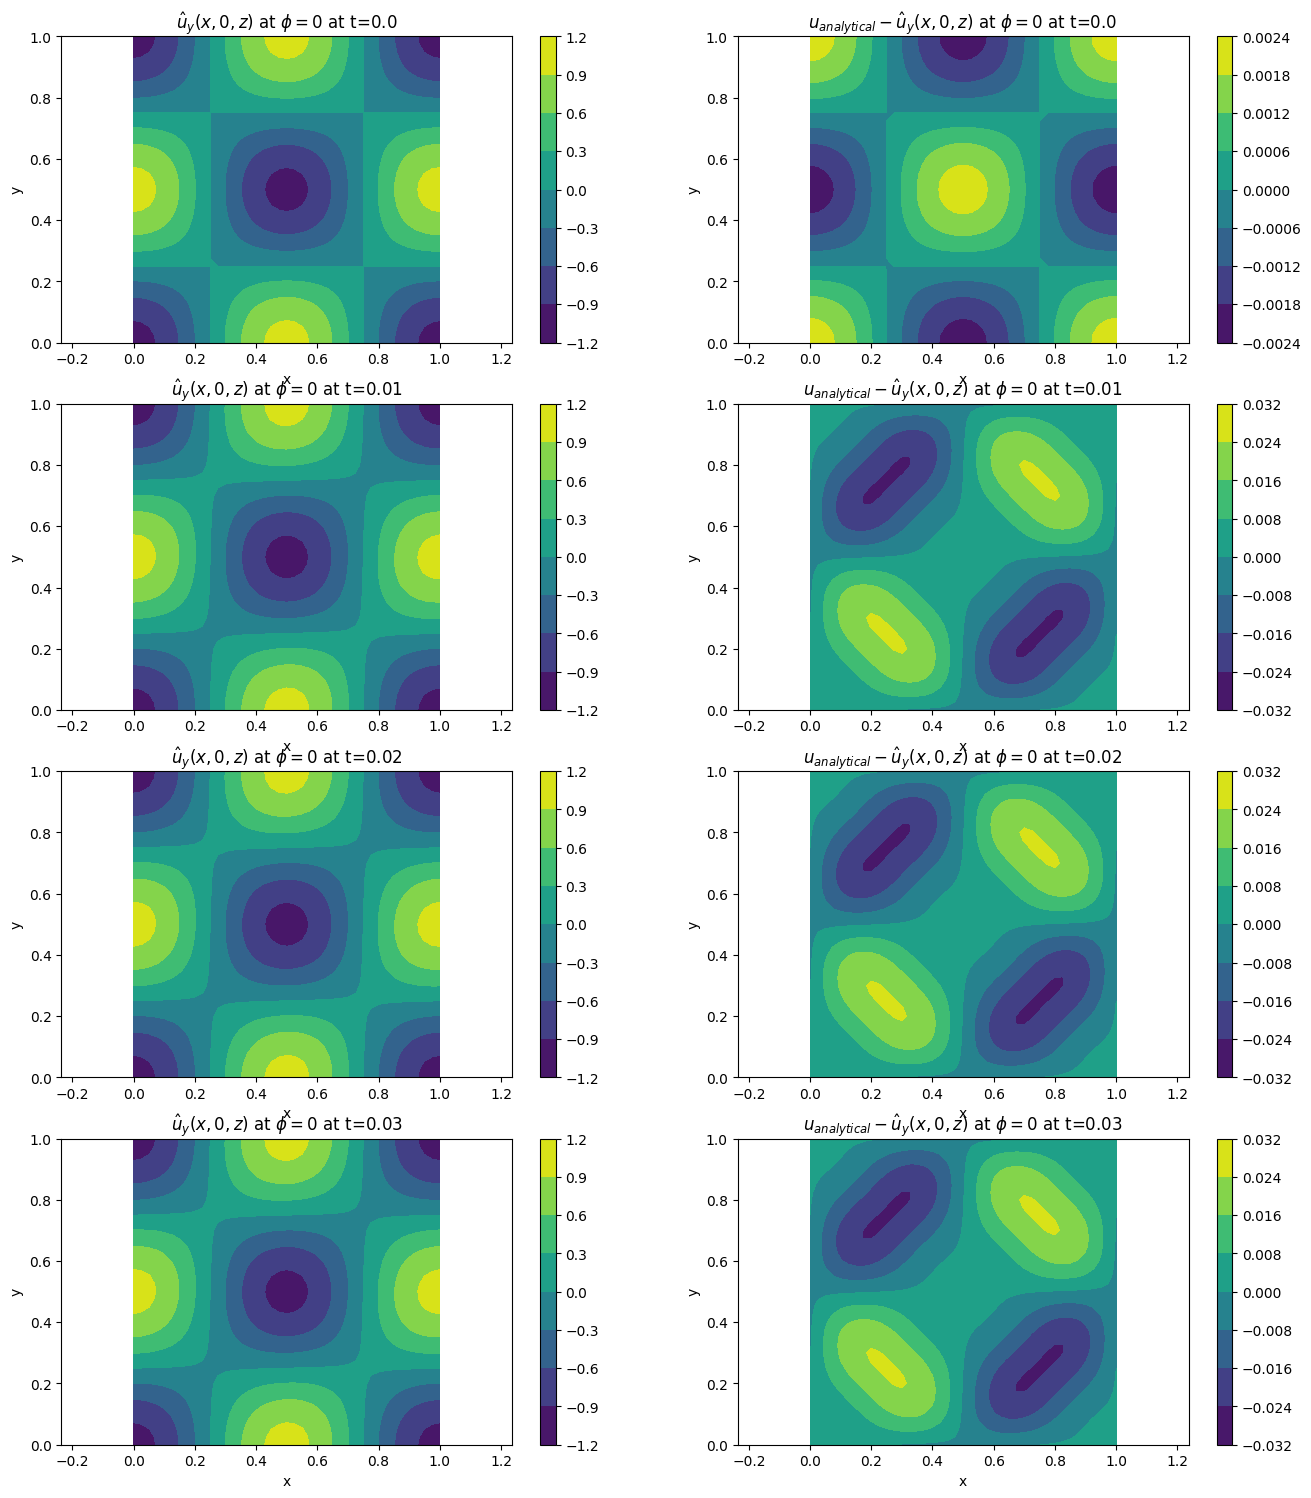

In [11]:
if len(u_phy)>= 1000: 
    plt.figure(figsize=(32, 55))
    for n, (t, u_comps) in enumerate(u_phy.items()): 
        # u_xyz
        if n%100 == 0:
            plt.subplot(22, 2, 2*n//100+1)
            plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], u_comps[1][:, :, 0])
            plt.colorbar()
            plt.title(f'$\hat u_y(x, 0, z)$ at $\phi=0$ at t={t}')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.axis('equal')
            
            plt.subplot(22, 2, 2*n//100+2)
            plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], uanalyt[1][:, :, 0]-u_comps[1][:, :, 0])
            plt.colorbar()
            plt.title(r'$u_{analytical}-\hat u_y(x, 0, z)$ at $\phi=0$ at 'f'  t={t}')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.axis('equal')
        
elif len(u_phy)>=100:
    plt.figure(figsize=(32, 55))
    for n, (t, u_comps) in enumerate(u_phy.items()): 
        # u_xyz
        if n%10 == 0:
            plt.subplot(22, 2, 2*n//10+1)
            plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], u_comps[1][:, :, 0])
            plt.colorbar()
            plt.title(f'$\hat u_y(x, 0, z)$ at $\phi=0$ at t={t}')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.axis('equal')
            
            plt.subplot(22, 2, 2*n//10+2)
            plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], uanalyt[1][:, :, 0]-u_comps[1][:, :, 0])
            plt.colorbar()
            plt.title(r'$u_{analytical}-\hat u_y(x, 0, z)$ at $\phi=0$ at 'f'  t={t}')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.axis('equal')
        
elif len(u_phy)>=20:
    plt.figure(figsize=(16, 66))
    for n, (t, u_comps) in enumerate(u_phy.items()): 
        # u_xyz
        if n%2 == 0:
            plt.subplot(26, 2, 2*n//2+1)
            plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], u_comps[1][:, :, 0])
            plt.colorbar()
            plt.title(f'$\hat u_y(x, 0, z)$ at $\phi=0$ at t={t}')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.axis('equal')
            
            plt.subplot(26, 2, 2*n//2+2)
            plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], uanalyt[1][:, :, 0]-u_comps[1][:, :, 0])
            plt.colorbar()
            plt.title(r'$u_{analytical}-\hat u_y(x, 0, z)$ at $\phi=0$ at 'f'  t={t}')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.axis('equal')
        
else:
    plt.figure(figsize=(16, 66))
    for n, (t, u_comps) in enumerate(u_phy.items()): 
        # u_xyz
        plt.subplot(14, 2, 2*n+1)
        plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], u_comps[1][:, :, 0])
        plt.colorbar()
        plt.title(f'$\hat u_y(x, 0, z)$ at $\phi=0$ at t={t}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.axis('equal')
        
        plt.subplot(14, 2, 2*n+2)
        plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], uanalyt[1][:, :, 0]-u_comps[1][:, :, 0])
        plt.colorbar()
        plt.title(r'$u_{analytical}-\hat u_y(x, 0, z)$ at $\phi=0$ at'f' t={t}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.axis('equal')
        

## Compare each term of the system implemented in Propagator with manufactured solution

In [12]:
from struphy.initial import perturbations
from struphy.feec.projectors import L2Projector
from struphy.feec.psydac_derham import TransformedPformComponent
from struphy.geometry.domains import Cuboid
from struphy.feec.mass import WeightedMassOperators
from struphy.feec.psydac_derham import Derham
from struphy.fields_background.equils import FluxAlignedTokamak, HomogenSlab
from struphy.propagators.propagators_fields import Stokes
from struphy.feec.basis_projection_ops import BasisProjectionOperators
from mpi4py import MPI

# default parameters of the Propagator
opts = Stokes.options(default=True)

print(parameters['geometry'])

params_map = parameters['geometry']['Cuboid']
params_grid = parameters['grid']
params_fluid_mhd = parameters['fluid_background']['HomogenSlab']
Nel = parameters['grid']['Nel']
p = parameters['grid']['p']
spl_kind = parameters['grid']['spl_kind']
dirichlet_bc = parameters['grid']['dirichlet_bc']
dims_mask = parameters['grid']['dims_mask']
nq_el = parameters['grid']['nq_el']
nq_pr = parameters['grid']['nq_pr']
polar_ck = parameters['grid']['polar_ck']
Nclones= parameters['grid']['Nclones']

mpi_comm = MPI.COMM_WORLD

domain = Cuboid(**params_map)
derham = Derham(Nel, p, spl_kind, comm=mpi_comm, dirichlet_bc=dirichlet_bc, domain = domain, nq_pr=nq_pr, polar_ck=polar_ck)
eq_mhd = HomogenSlab(**params_fluid_mhd)
eq_mhd.domain = domain
mass_ops = WeightedMassOperators(derham, domain, eq_mhd=eq_mhd)
bas_ops = BasisProjectionOperators(derham, domain, eq_mhd=eq_mhd)

F1 = derham.create_field('rhs1', 'Hdiv')
F2 = derham.create_field('rhs2', 'Hdiv')

### Manufactured solution
_forceterm_logical = lambda e1, e2, e3: 0 * e1
_funx = getattr(perturbations, "ManufacturedSolutionForceterm_x")()
_funy = getattr(perturbations, "ManufacturedSolutionForceterm_y")()
_funelectronsx = getattr(perturbations, "ManufacturedSolutionForcetermElectrons_x")()
_funelectronsy = getattr(perturbations, "ManufacturedSolutionForcetermElectrons_y")()

# get callable(s) for specified init type
forceterm_class = [_funx, _funy, _forceterm_logical]
forcetermelectrons_class = [_funelectronsx, _funelectronsy,_forceterm_logical]

# pullback callable
funx = TransformedPformComponent(forceterm_class, fun_basis="physical", out_form="2", comp=0, domain=domain)
funy = TransformedPformComponent(forceterm_class, fun_basis="physical", out_form="2", comp=1, domain=domain)
fun_electronsx = TransformedPformComponent(
    forcetermelectrons_class, fun_basis="physical", out_form="2", comp=0, domain=domain
) 
fun_electronsy = TransformedPformComponent(
    forcetermelectrons_class, fun_basis="physical", out_form="2", comp=1, domain=domain
) 
l2_proj = L2Projector(space_id='Hdiv', mass_ops=mass_ops)
F1.vector = l2_proj([funx, funy, _forceterm_logical])
F2.vector = l2_proj([fun_electronsx, fun_electronsy, _forceterm_logical])
# F1.vector = derham.P["2"]((funx, funy, _forceterm_logical))
# F2.vector = derham.P["2"]((fun_electronsx, fun_electronsy, _forceterm_logical))
   

{'type': 'Cuboid', 'Cuboid': {'l1': 0.0, 'r1': 1.0, 'l2': 0.0, 'r2': 1.0, 'l3': 0.0, 'r3': 1.0}}

Assembling matrix of WeightedMassOperator "M2" with V=Hdiv, W=Hdiv.
Assemble block (0, 0)
Assemble block (0, 1)
Assemble block (0, 2)
Assemble block (1, 0)
Assemble block (1, 1)
Assemble block (1, 2)
Assemble block (2, 0)
Assemble block (2, 1)
Assemble block (2, 2)
Done.


In [13]:
#forceterm from perturbations
_F1_pertx = getattr(perturbations, "ManufacturedSolutionForceterm_x")() 
_F1_perty = getattr(perturbations, "ManufacturedSolutionForceterm_y")() 
F1_pert = [_F1_pertx, _F1_perty, 0*x_grid]

_F2_pertx = getattr(perturbations, "ManufacturedSolutionForcetermElectrons_x")() 
_F2_perty = getattr(perturbations, "ManufacturedSolutionForcetermElectrons_y")() 
F2_pert = [_F2_pertx, _F2_perty, 0*x_grid]


In [14]:
Fone = F1(e1_grid,e2_grid,e3_grid)

Fone_x = domain.push(Fone[0], e1_grid, e2_grid, e3_grid, squeeze_out=True)
Fone_y = domain.push(Fone[1], e1_grid, e2_grid, e3_grid, squeeze_out=True)
Fone_z = domain.push(Fone[2], e1_grid, e2_grid, e3_grid, squeeze_out=True)
Fone_xyz = [Fone_x, Fone_y, Fone_z]

Ftwo = F2(e1_grid,e2_grid,e3_grid)

Ftwo_x = domain.push(Ftwo[0], e1_grid, e2_grid, e3_grid, squeeze_out=True)
Ftwo_y = domain.push(Ftwo[1], e1_grid, e2_grid, e3_grid, squeeze_out=True)
Ftwo_z = domain.push(Ftwo[2], e1_grid, e2_grid, e3_grid, squeeze_out=True)
Ftwo_xyz = [Ftwo_x, Ftwo_y, Ftwo_z]


## Forceterm in propagator, perturbations and manufactured solution

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

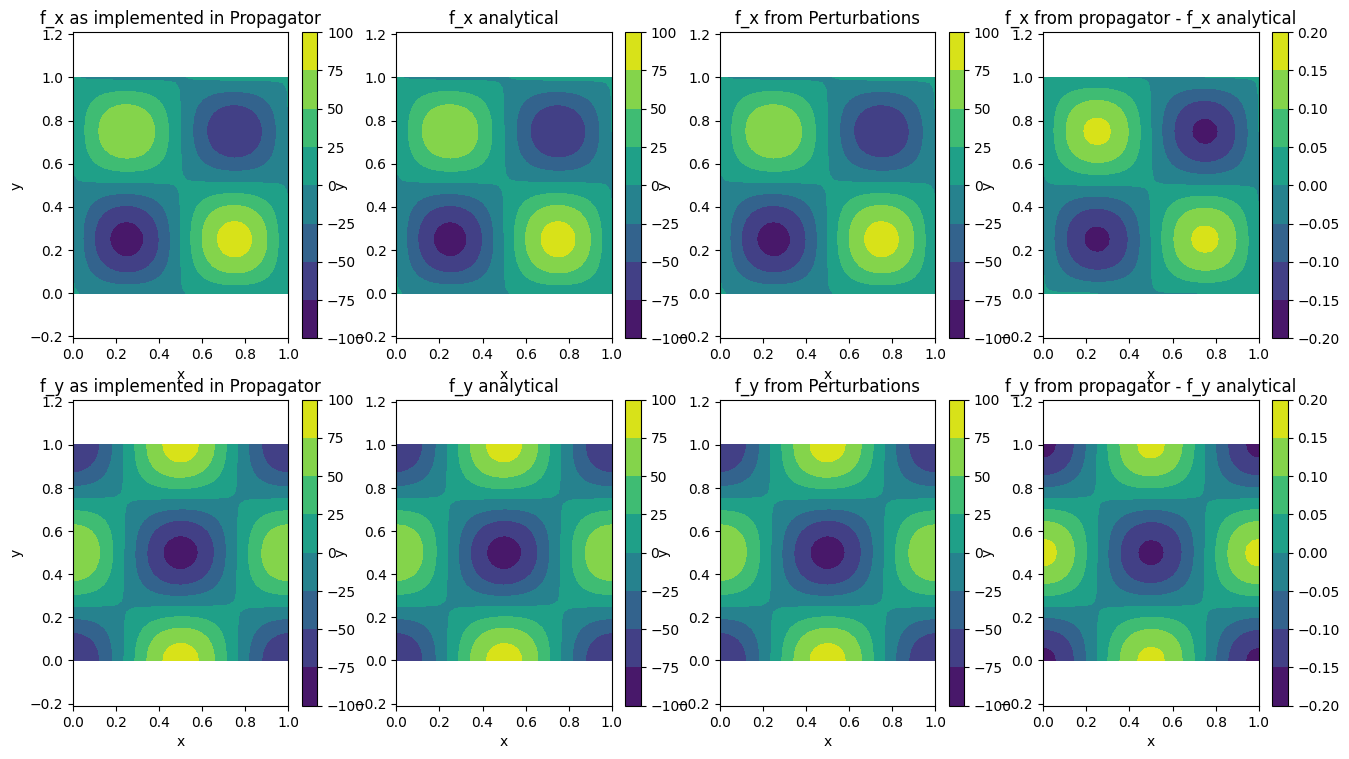

In [15]:
plt.figure(figsize=(16, 66))
# u_xyz
plt.subplot(14, 4, 1)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Fone_xyz[0][:,:,0])
plt.colorbar()
plt.title(f'f_x as implemented in Propagator')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 2)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], F1analytic[0][:, :, 0])
plt.colorbar()
plt.title(f'f_x analytical')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 3)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], F1_pert[0](x_grid[:, :, 0], y_grid[:, :, 0], z_grid[:, :, 0]))
plt.colorbar()
plt.title(f'f_x from Perturbations')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 4)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Fone_xyz[0][:,:,0]-F1analytic[0][:, :, 0])
plt.colorbar()
plt.title(f'f_x from propagator - f_x analytical')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')

plt.subplot(14, 4, 5)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Fone_xyz[1][:,:,0])
plt.colorbar()
plt.title(f'f_y as implemented in Propagator')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 6)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], F1analytic[1][:, :, 0])
plt.colorbar()
plt.title(f'f_y analytical')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 7)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], F1_pert[1](x_grid[:, :, 0], y_grid[:, :, 0], z_grid[:, :, 0]))
plt.colorbar()
plt.title(f'f_y from Perturbations')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 8)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Fone_xyz[1][:,:,0]-F1analytic[1][:, :, 0])
plt.colorbar()
plt.title(f'f_y from propagator - f_y analytical')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

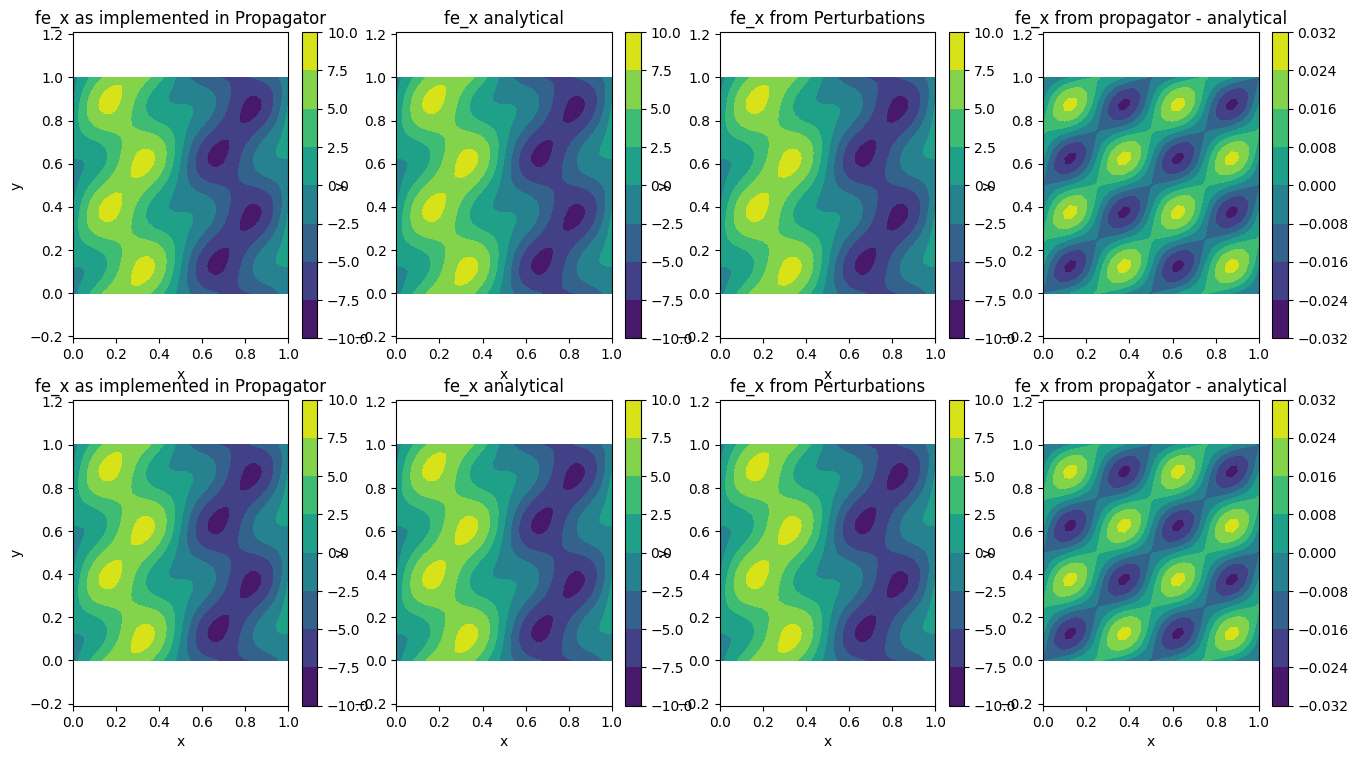

In [16]:
plt.figure(figsize=(16, 66))
# u_xyz
plt.subplot(14, 4, 1)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Ftwo_xyz[0][:,:,0])
plt.colorbar()
plt.title(f'fe_x as implemented in Propagator')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 2)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], F2analytic[0][:, :, 0])
plt.colorbar()
plt.title(f'fe_x analytical')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 3)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], F2_pert[0](x_grid[:, :, 0], y_grid[:, :, 0], z_grid[:, :, 0]))
plt.colorbar()
plt.title(f'fe_x from Perturbations')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 4)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Ftwo_xyz[0][:,:,0]-F2analytic[0][:, :, 0])
plt.colorbar()
plt.title(f'fe_x from propagator - analytical')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')

plt.subplot(14, 4, 5)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Ftwo_xyz[0][:,:,0])
plt.colorbar()
plt.title(f'fe_x as implemented in Propagator')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 6)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], F2analytic[0][:, :, 0])
plt.colorbar()
plt.title(f'fe_x analytical')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 7)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], F2_pert[0](x_grid[:, :, 0], y_grid[:, :, 0], z_grid[:, :, 0]))
plt.colorbar()
plt.title(f'fe_x from Perturbations')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 8)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Ftwo_xyz[0][:,:,0]-F2analytic[0][:, :, 0])
plt.colorbar()
plt.title(f'fe_x from propagator - analytical')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')


In [17]:
Stokes.derham = derham
Stokes.domain = domain
Stokes.mass_ops = mass_ops
Stokes.basis_ops = bas_ops

uvec = derham.create_field('manufac u', 'Hdiv')
u_evec = derham.create_field('manufac u_e', 'Hdiv')
potentialvec = derham.create_field('manufac potential', 'L2')

uanalytx = lambda x,y,z: -np.sin(2*np.pi*x)*np.sin(2*np.pi*y)
uanalyty = lambda x,y,z: -np.cos(2*np.pi*x)*np.cos(2*np.pi*y)
uanalytz = lambda x,y,z: 0.0*x
# u_eanalytx = lambda x,y,z: -2.0*np.sin(2*np.pi*x)*np.sin(2*np.pi*y)
# u_eanalyty = lambda x,y,z: -2.0*np.cos(2*np.pi*x)*np.cos(2*np.pi*y)
# u_eanalytz = lambda x,y,z: 0.0*x
u_eanalytx = lambda x,y,z: -np.sin(4*np.pi*x)*np.sin(4*np.pi*y)
u_eanalyty = lambda x,y,z: -np.cos(4*np.pi*x)*np.cos(4*np.pi*y)
u_eanalytz = lambda x,y,z: 0.0*x
potential_analyticalxyz = lambda x,y,z: np.cos(2*np.pi*x)+np.sin(2*np.pi*y)

#pullback to logical unit cube
potential_logical = lambda e1, e2, e3: domain.pull(potential_analyticalxyz, e1, e2, e3)
uanalyt_logical1 = lambda e1, e2, e3: domain.pull(uanalytx, e1, e2, e3)
uanalyt_logical2 = lambda e1, e2, e3: domain.pull(uanalyty, e1, e2, e3)
uanalyt_logical3 = lambda e1, e2, e3: domain.pull(uanalytz, e1, e2, e3)
uanalyt_logical = [uanalyt_logical1, uanalyt_logical2, uanalyt_logical3]
u_eanalyt_logical1 = lambda e1, e2, e3: domain.pull(u_eanalytx, e1, e2, e3)
u_eanalyt_logical2 = lambda e1, e2, e3: domain.pull(u_eanalyty, e1, e2, e3)
u_eanalyt_logical3 = lambda e1, e2, e3: domain.pull(u_eanalytz, e1, e2, e3)
u_eanalyt_logical = [u_eanalyt_logical1, u_eanalyt_logical2, u_eanalyt_logical3]

#compute initial FE coeffs by projection
potentialvec.vector = derham.P['3'](potential_logical)

uvec.vector = derham.P['2'](uanalyt_logical)
u_evec.vector = derham.P['2'](u_eanalyt_logical)
uvec.initialize_coeffs()
u_evec.initialize_coeffs()


In [18]:
from psydac.linalg.block import BlockLinearOperator, BlockVector, BlockVectorSpace

In [19]:
M2B = mass_ops.M2B
M2 = mass_ops.M2
Hodge = bas_ops.S21
C = mass_ops.derham.curl
D = mass_ops.derham.div
G = mass_ops.derham.grad
M3 = mass_ops.M3
DT = D.transpose()
CT = C.transpose()


Assembling matrix of WeightedMassOperator "M2B" with V=Hdiv, W=Hdiv.
Assemble block (0, 0)
Assemble block (0, 1)
Assemble block (0, 2)
Assemble block (1, 0)
Assemble block (1, 1)
Assemble block (1, 2)
Assemble block (2, 0)
Assemble block (2, 1)
Assemble block (2, 2)
Done.
Assembling BasisProjectionOperator "S21" with V=Hdiv, W=Hcurl.
Done.

Assembling matrix of WeightedMassOperator "M3" with V=L2, W=L2.
Assemble block (0, 0)
Done.


In [20]:
# prop = Stokes(uvec.vector, u_evec.vector, potentialvec.vector, alpha =0.1, beta= 1.0, eps=0.00001, Nel=Nel, p=p, spl_kind=spl_kind)

In [21]:
# # time stepping
# Tend = 0.03
# dt = 0.01

# Ex_of_t = {}
# time = 0.
# n = 0
# while time < Tend:
#     n += 1
    
#     # advance in time
#     prop(dt)
#     time += dt

In [22]:
Rotationtest = derham.create_field('rot1', 'Hdiv')
Rotationtest.vector = M2B.dot(uvec.vector)
Rottest1 = Rotationtest(e1_grid,e2_grid,e3_grid)
Rottest1_x = domain.push(Rottest1[0], e1_grid, e2_grid, e3_grid, squeeze_out=True)
Rottest1_y = domain.push(Rottest1[1], e1_grid, e2_grid, e3_grid, squeeze_out=True)
Rottest1_z = domain.push(Rottest1[2], e1_grid, e2_grid, e3_grid, squeeze_out=True)
Rottest1_xyz = [Rottest1_x, Rottest1_y, Rottest1_z]

Rotationtest2 = derham.create_field('rot2', 'Hdiv')
Rotationtest2.vector = -M2B.dot(u_evec.vector)
Rottest2 = Rotationtest2(e1_grid,e2_grid,e3_grid)
Rottest2_x = domain.push(Rottest2[0], e1_grid, e2_grid, e3_grid, squeeze_out=True)
Rottest2_y = domain.push(Rottest2[1], e1_grid, e2_grid, e3_grid, squeeze_out=True)
Rottest2_z = domain.push(Rottest2[2], e1_grid, e2_grid, e3_grid, squeeze_out=True)
Rottest2_xyz = [Rottest2_x, Rottest2_y, Rottest2_z]

# Rotation analytical
# u x B
Rot1analyticx = -np.cos(2*np.pi*x_grid)*np.cos(2*np.pi*y_grid)*b0
Rot1analyticy = +np.sin(2*np.pi*x_grid)*np.sin(2*np.pi*y_grid)*b0
Rot1analytic = [Rot1analyticx, Rot1analyticy, 0*x_grid]  

# -ue x B:
# Rot2analyticx = +2.0*np.cos(2*np.pi*x_grid)*np.cos(2*np.pi*y_grid)*b0
# Rot2analyticy = -2.0*np.sin(2*np.pi*x_grid)*np.sin(2*np.pi*y_grid)*b0
Rot2analyticx = +np.cos(4*np.pi*x_grid)*np.cos(4*np.pi*y_grid)*b0
Rot2analyticy = -np.sin(4*np.pi*x_grid)*np.sin(4*np.pi*y_grid)*b0
Rot2analytic = [Rot2analyticx, Rot2analyticy, 0*x_grid]   

## M2B compared with u $\times$ B

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

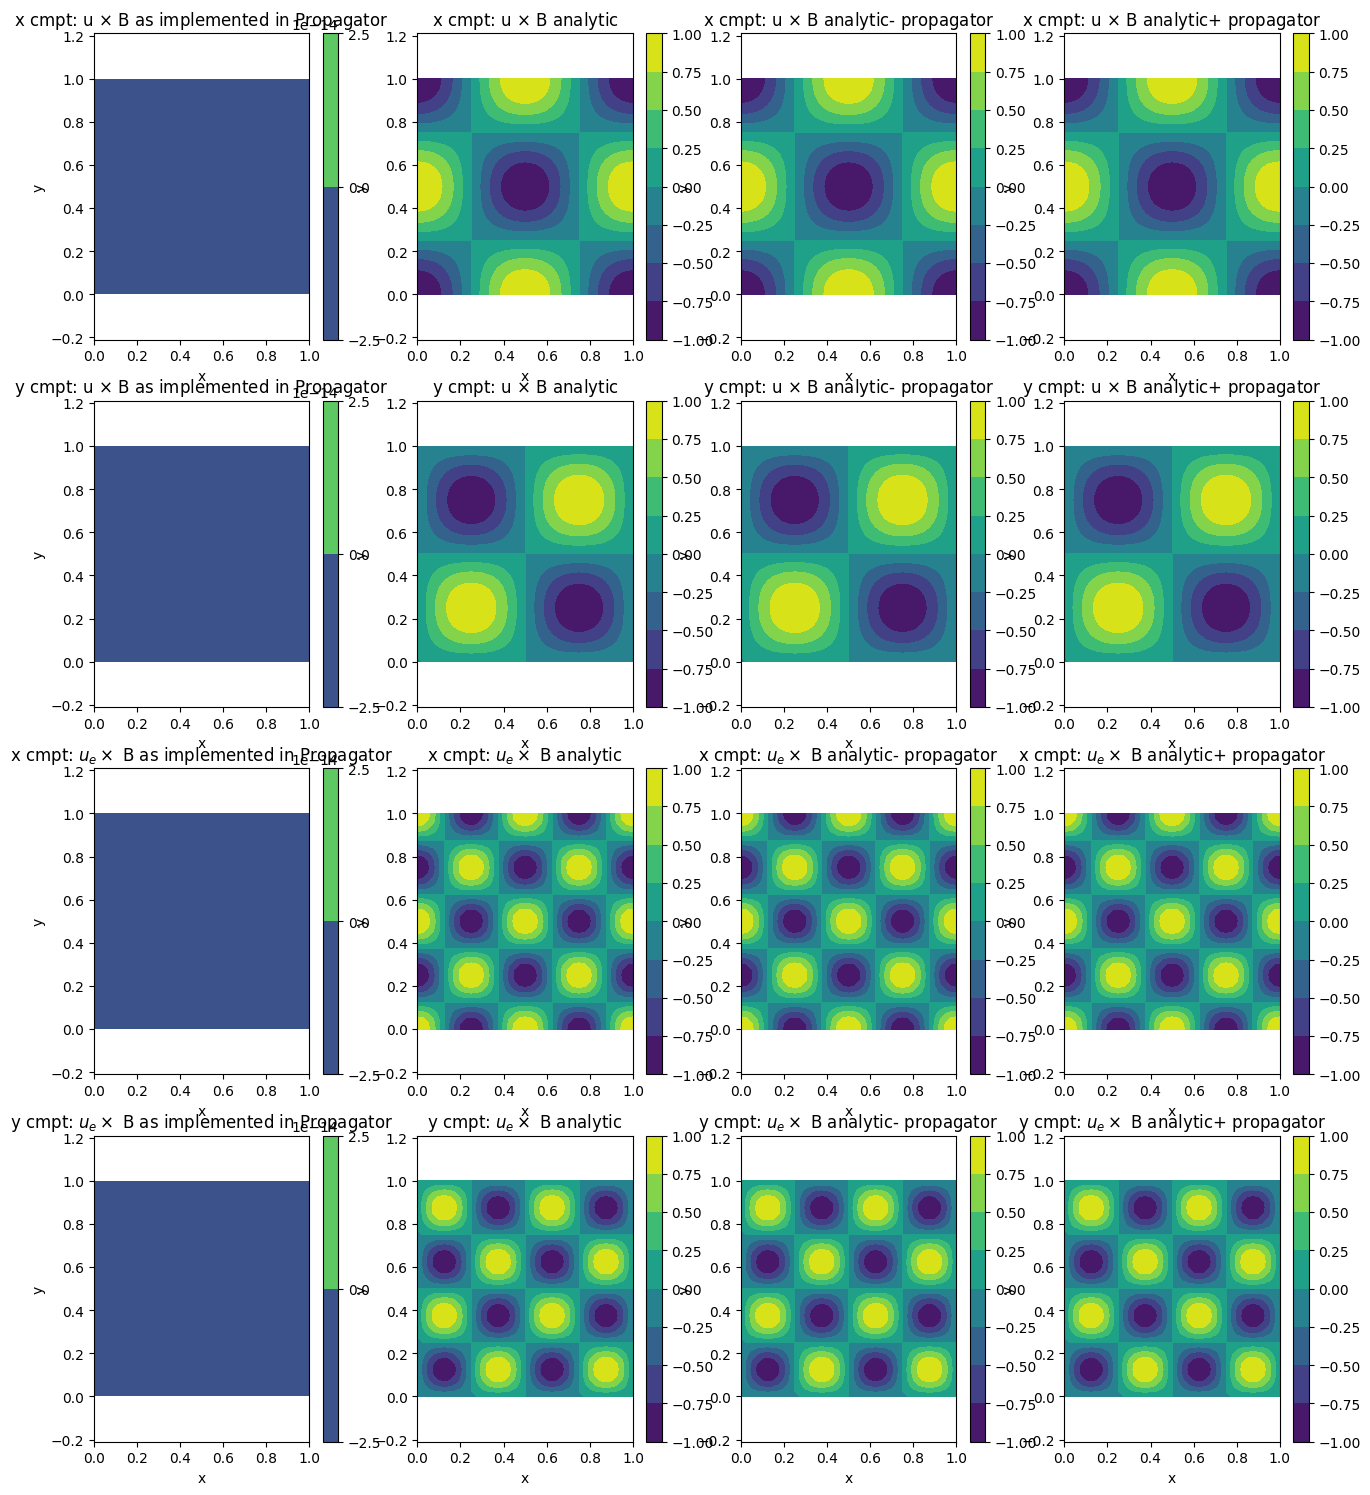

In [23]:
plt.figure(figsize=(16, 66))
# u_xyz
plt.subplot(14, 4, 1)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Rottest1_xyz[0][:,:,0])
plt.colorbar()
plt.title(r'x cmpt: u $\times$ B as implemented in Propagator')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 2)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Rot1analytic[0][:,:,0])
plt.colorbar()
plt.title(r'x cmpt: u $\times$ B analytic')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 3)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Rot1analytic[0][:,:,0]-Rottest1_xyz[0][:,:,0])
plt.colorbar()
plt.title(r'x cmpt: u $\times$ B analytic- propagator')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 4)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Rot1analytic[0][:,:,0]+Rottest1_xyz[0][:,:,0])
plt.colorbar()
plt.title(r'x cmpt: u $\times$ B analytic+ propagator')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 5)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Rottest1_xyz[1][:,:,0])
plt.colorbar()
plt.title(r'y cmpt: u $\times$ B as implemented in Propagator')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 6)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Rot1analytic[1][:,:,0])
plt.colorbar()
plt.title(r'y cmpt: u $\times$ B analytic')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 7)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Rot1analytic[1][:,:,0]-Rottest1_xyz[1][:,:,0])
plt.colorbar()
plt.title(r'y cmpt: u $\times$ B analytic- propagator')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 8)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Rot1analytic[1][:,:,0]+Rottest1_xyz[1][:,:,0])
plt.colorbar()
plt.title(r'y cmpt: u $\times$ B analytic+ propagator')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')


plt.subplot(14, 4, 9)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Rottest2_xyz[0][:,:,0])
plt.colorbar()
plt.title(r'x cmpt: $u_e \times$ B as implemented in Propagator')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 10)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Rot2analytic[0][:,:,0])
plt.colorbar()
plt.title(r'x cmpt: $u_e \times$ B analytic')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 11)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Rot2analytic[0][:,:,0]-Rottest2_xyz[0][:,:,0])
plt.colorbar()
plt.title(r'x cmpt: $u_e \times$ B analytic- propagator')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 12)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Rot2analytic[0][:,:,0]+Rottest2_xyz[0][:,:,0])
plt.colorbar()
plt.title(r'x cmpt: $u_e \times$ B analytic+ propagator')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 13)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Rottest2_xyz[1][:,:,0])
plt.colorbar()
plt.title(r'y cmpt: $u_e \times$ B as implemented in Propagator')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 14)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Rot2analytic[1][:,:,0])
plt.colorbar()
plt.title(r'y cmpt: $u_e \times$ B analytic')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 15)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Rot2analytic[1][:,:,0]-Rottest2_xyz[1][:,:,0])
plt.colorbar()
plt.title(r'y cmpt: $u_e \times$ B analytic- propagator')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 16)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Rot2analytic[1][:,:,0]+Rottest2_xyz[1][:,:,0])
plt.colorbar()
plt.title(r'y cmpt: $u_e \times$ B analytic+ propagator')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')

In [24]:
Laplacetest = derham.create_field('lap1', 'Hdiv')
A11 = DT @ M3 @ D + Hodge.transpose() @ CT @ M2 @ C @Hodge
Laplacetest.vector = nu*(A11).dot(uvec.vector)
Laptest1 = Laplacetest(e1_grid,e2_grid,e3_grid)
Laptest1_x = domain.push(Laptest1[0], e1_grid, e2_grid, e3_grid, squeeze_out=True)
Laptest1_y = domain.push(Laptest1[1], e1_grid, e2_grid, e3_grid, squeeze_out=True)
Laptest1_z = domain.push(Laptest1[2], e1_grid, e2_grid, e3_grid, squeeze_out=True)
Laptest1_xyz = [Laptest1_x, Laptest1_y, Laptest1_z]

Laplacetest2 = derham.create_field('lap2', 'Hdiv')
Laplacetest2.vector = nu_e*(DT@M3@D+Hodge.transpose()@CT@M2@C@Hodge).dot(u_evec.vector)
Laptest2 = Laplacetest2(e1_grid,e2_grid,e3_grid)
Laptest2_x = domain.push(Laptest2[0], e1_grid, e2_grid, e3_grid, squeeze_out=True)
Laptest2_y = domain.push(Laptest2[1], e1_grid, e2_grid, e3_grid, squeeze_out=True)
Laptest2_z = domain.push(Laptest2[2], e1_grid, e2_grid, e3_grid, squeeze_out=True)
Laptest2_xyz = [Laptest2_x, Laptest2_y, Laptest2_z]

# Laplace analytical
Lap1analyticx = nu*8.0*np.pi**2*np.sin(2*np.pi*x_grid)*np.sin(2*np.pi*y_grid) #/200
Lap1analyticy = nu*8.0*np.pi**2*np.cos(2*np.pi*x_grid)*np.cos(2*np.pi*y_grid) #/200
Lap1analytic = [Lap1analyticx, Lap1analyticy, 0*x_grid]  

# Lap2analyticx = nu_e*8.0*np.pi**2*np.sin(2*np.pi*x_grid)*np.sin(2*np.pi*y_grid)/20
# Lap2analyticy = nu_e*8.0*np.pi**2*np.cos(2*np.pi*x_grid)*np.cos(2*np.pi*y_grid) /20
Lap2analyticx = nu_e*32.0*np.pi**2*np.sin(4*np.pi*x_grid)*np.sin(4*np.pi*y_grid)
Lap2analyticy = nu_e*32.0*np.pi**2*np.cos(4*np.pi*x_grid)*np.cos(4*np.pi*y_grid)
Lap2analytic = [Lap2analyticx, Lap2analyticy, 0*x_grid]   


## Laplacian in propagator compared with $\Delta$ u

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

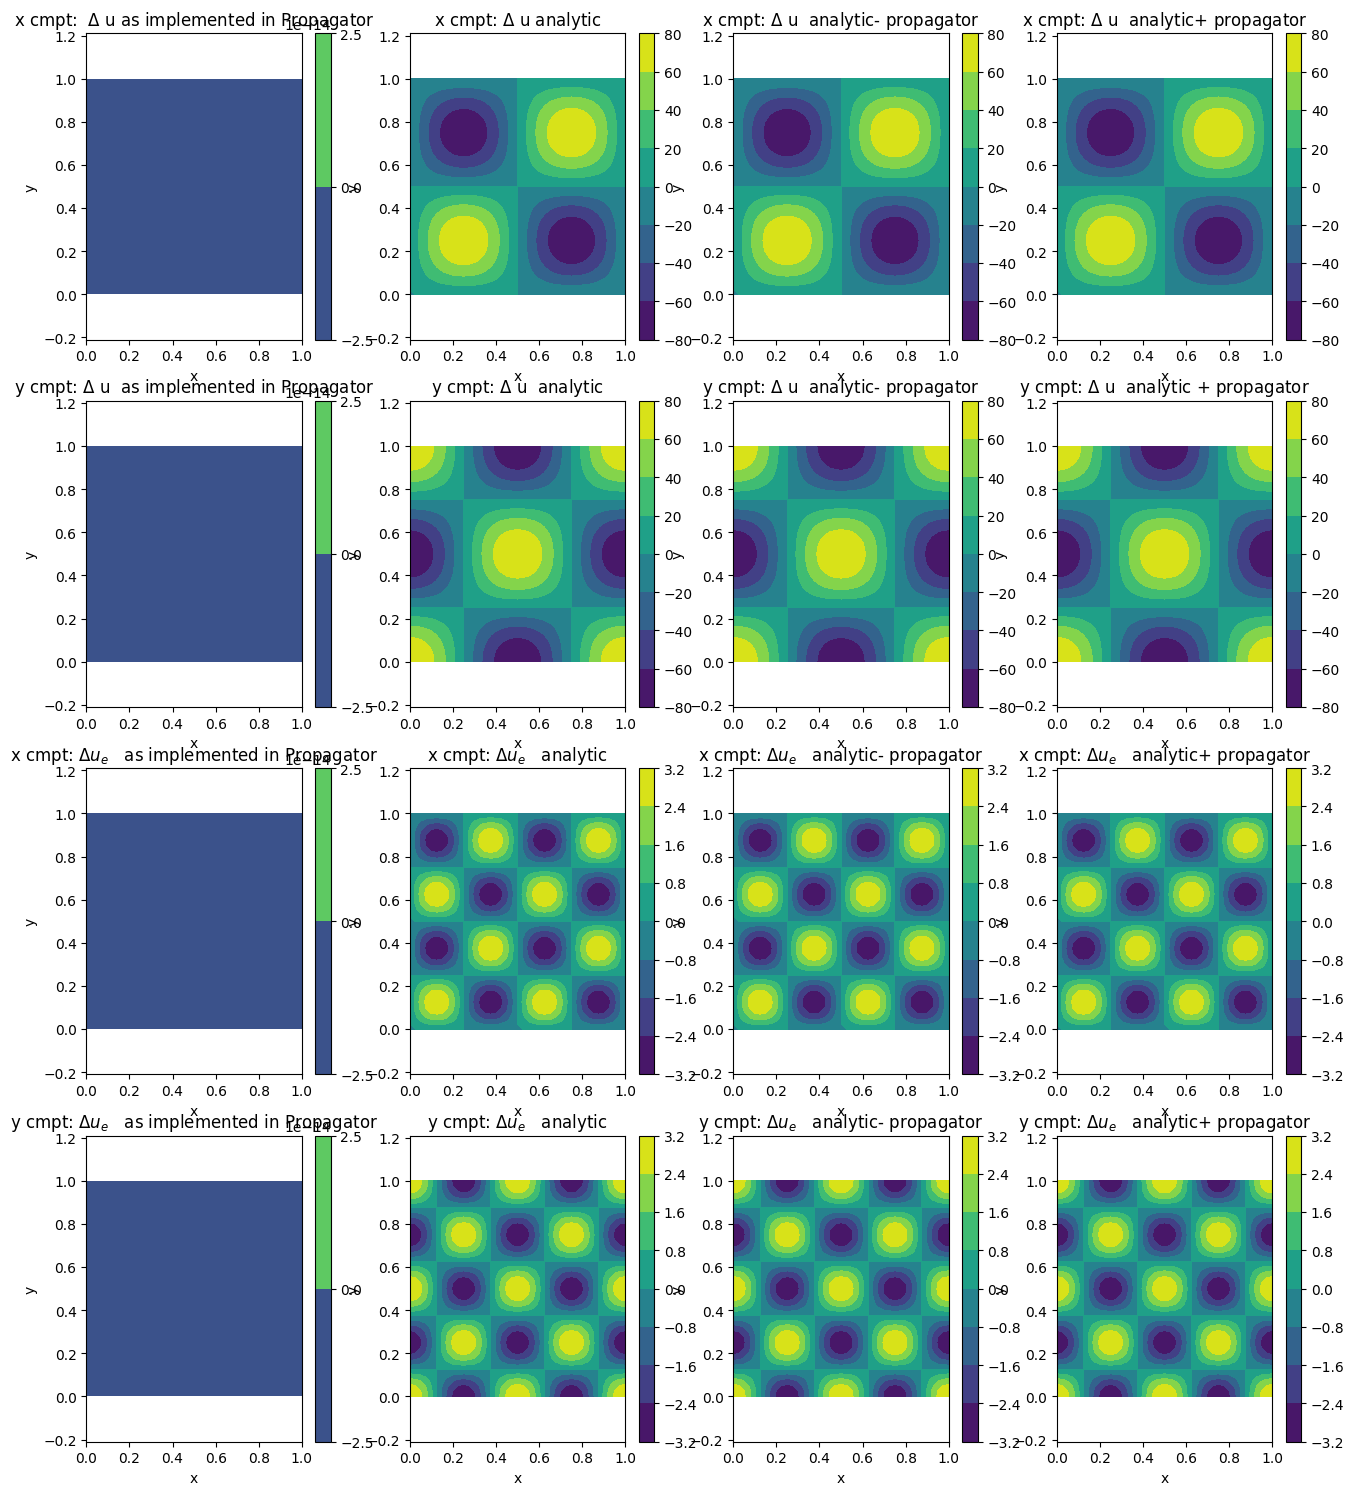

In [25]:
plt.figure(figsize=(16, 66))
# u_xyz
plt.subplot(14, 4, 1)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Laptest1_xyz[0][:,:,0])
plt.colorbar()
plt.title(r'x cmpt:  $\Delta$ u as implemented in Propagator')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 2)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Lap1analytic[0][:,:,0])
plt.colorbar()
plt.title(r'x cmpt: $\Delta$ u analytic')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 3)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Lap1analytic[0][:,:,0]-Laptest1_xyz[0][:,:,0])
plt.colorbar()
plt.title(r'x cmpt: $\Delta$ u  analytic- propagator')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 4)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Lap1analytic[0][:,:,0]+Laptest1_xyz[0][:,:,0])
plt.colorbar()
plt.title(r'x cmpt: $\Delta$ u  analytic+ propagator')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')

plt.subplot(14, 4, 5)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Laptest1_xyz[1][:,:,0])
plt.colorbar()
plt.title(r'y cmpt: $\Delta$ u  as implemented in Propagator')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 6)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Lap1analytic[1][:,:,0])
plt.colorbar()
plt.title(r'y cmpt: $\Delta$ u  analytic')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 7)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Lap1analytic[1][:,:,0]-Laptest1_xyz[1][:,:,0])
plt.colorbar()
plt.title(r'y cmpt: $\Delta$ u  analytic- propagator')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 8)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Lap1analytic[1][:,:,0]+Laptest1_xyz[1][:,:,0])
plt.colorbar()
plt.title(r'y cmpt: $\Delta$ u  analytic + propagator')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')


plt.subplot(14, 4, 9)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Laptest2_xyz[0][:,:,0])
plt.colorbar()
plt.title(r'x cmpt: $\Delta u_e$   as implemented in Propagator')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 10)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Lap2analytic[0][:,:,0])
plt.colorbar()
plt.title(r'x cmpt: $\Delta u_e$   analytic')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 11)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Lap2analytic[0][:,:,0]-Laptest2_xyz[0][:,:,0])
plt.colorbar()
plt.title(r'x cmpt: $\Delta u_e$   analytic- propagator')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 12)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Lap2analytic[0][:,:,0]+Laptest2_xyz[0][:,:,0])
plt.colorbar()
plt.title(r'x cmpt: $\Delta u_e$   analytic+ propagator')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')

plt.subplot(14, 4, 13)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Laptest2_xyz[1][:,:,0])
plt.colorbar()
plt.title(r'y cmpt: $\Delta u_e$   as implemented in Propagator')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 14)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Lap2analytic[1][:,:,0])
plt.colorbar()
plt.title(r'y cmpt: $\Delta u_e$   analytic')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 15)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Lap2analytic[1][:,:,0]-Laptest2_xyz[1][:,:,0])
plt.colorbar()
plt.title(r'y cmpt: $\Delta u_e$   analytic- propagator')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 16)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Lap2analytic[1][:,:,0]+Laptest2_xyz[1][:,:,0])
plt.colorbar()
plt.title(r'y cmpt: $\Delta u_e$   analytic+ propagator')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')

## Compare divergence of potential from propagator with manufactured $\nabla \phi$

In [26]:
Gradienttest = derham.create_field('lap1', 'Hdiv')
Gradienttest.vector = (DT@M3).dot(potentialvec.vector)
Gradtest1 = Gradienttest(e1_grid,e2_grid,e3_grid)
Gradtest1_x = domain.push(Gradtest1[0], e1_grid, e2_grid, e3_grid, squeeze_out=True)
Gradtest1_y = domain.push(Gradtest1[1], e1_grid, e2_grid, e3_grid, squeeze_out=True)
Gradtest1_z = domain.push(Gradtest1[2], e1_grid, e2_grid, e3_grid, squeeze_out=True)
Gradtest1_xyz = [Gradtest1_x, Gradtest1_y, Gradtest1_z]

# Gradient analytical
Grad1analyticx = -2.0*np.pi*np.sin(2*np.pi*x_grid)
Grad1analyticy = 2.0*np.pi*np.cos(2*np.pi*y_grid)
Grad1analytic = [Grad1analyticx, Grad1analyticy, 0*x_grid]  

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

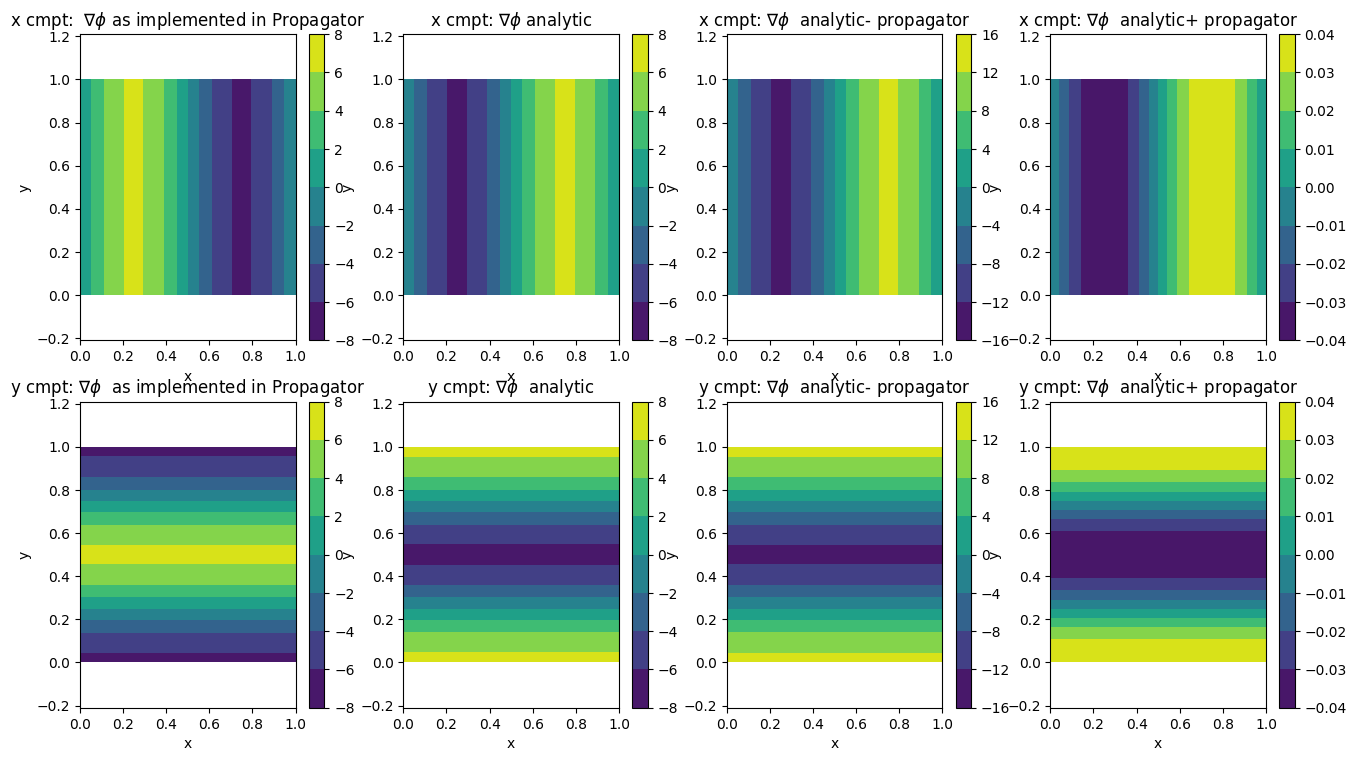

In [27]:
plt.figure(figsize=(16, 66))
# u_xyz
plt.subplot(14, 4, 1)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Gradtest1_xyz[0][:,:,0])
plt.colorbar()
plt.title(r'x cmpt:  $\nabla \phi$ as implemented in Propagator')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 2)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Grad1analytic[0][:,:,0])
plt.colorbar()
plt.title(r'x cmpt: $\nabla \phi$ analytic')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 3)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Grad1analytic[0][:,:,0]-Gradtest1_xyz[0][:,:,0])
plt.colorbar()
plt.title(r'x cmpt: $\nabla \phi$  analytic- propagator')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 4)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Grad1analytic[0][:,:,0]+Gradtest1_xyz[0][:,:,0])
plt.colorbar()
plt.title(r'x cmpt: $\nabla \phi$  analytic+ propagator')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')

plt.subplot(14, 4, 5)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Gradtest1_xyz[1][:,:,0])
plt.colorbar()
plt.title(r'y cmpt: $\nabla \phi$  as implemented in Propagator')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 6)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Grad1analytic[1][:,:,0])
plt.colorbar()
plt.title(r'y cmpt: $\nabla \phi$  analytic')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 7)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Grad1analytic[1][:,:,0]-Gradtest1_xyz[1][:,:,0])
plt.colorbar()
plt.title(r'y cmpt: $\nabla \phi$  analytic- propagator')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.subplot(14, 4, 8)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], Grad1analytic[1][:,:,0]+Gradtest1_xyz[1][:,:,0])
plt.colorbar()
plt.title(r'y cmpt: $\nabla \phi$  analytic+ propagator')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')

## Compare manufactured u with u generated by fields

In [28]:
uone = uvec(e1_grid,e2_grid,e3_grid)

uone_x = domain.push(uone[0], e1_grid, e2_grid, e3_grid, squeeze_out=True)
uone_y = domain.push(uone[1], e1_grid, e2_grid, e3_grid, squeeze_out=True)
uone_z = domain.push(uone[2], e1_grid, e2_grid, e3_grid, squeeze_out=True)
uone_xyz = [uone_x, uone_y, uone_z]

utwo = u_evec(e1_grid,e2_grid,e3_grid)

utwo_x = domain.push(utwo[0], e1_grid, e2_grid, e3_grid, squeeze_out=True)
utwo_y = domain.push(utwo[1], e1_grid, e2_grid, e3_grid, squeeze_out=True)
utwo_z = domain.push(utwo[2], e1_grid, e2_grid, e3_grid, squeeze_out=True)
utwo_xyz = [utwo_x, utwo_y, utwo_z]

potentialone = potentialvec(e1_grid,e2_grid,e3_grid)

potential_xyz = domain.push(potentialone, e1_grid, e2_grid, e3_grid, squeeze_out=True)

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

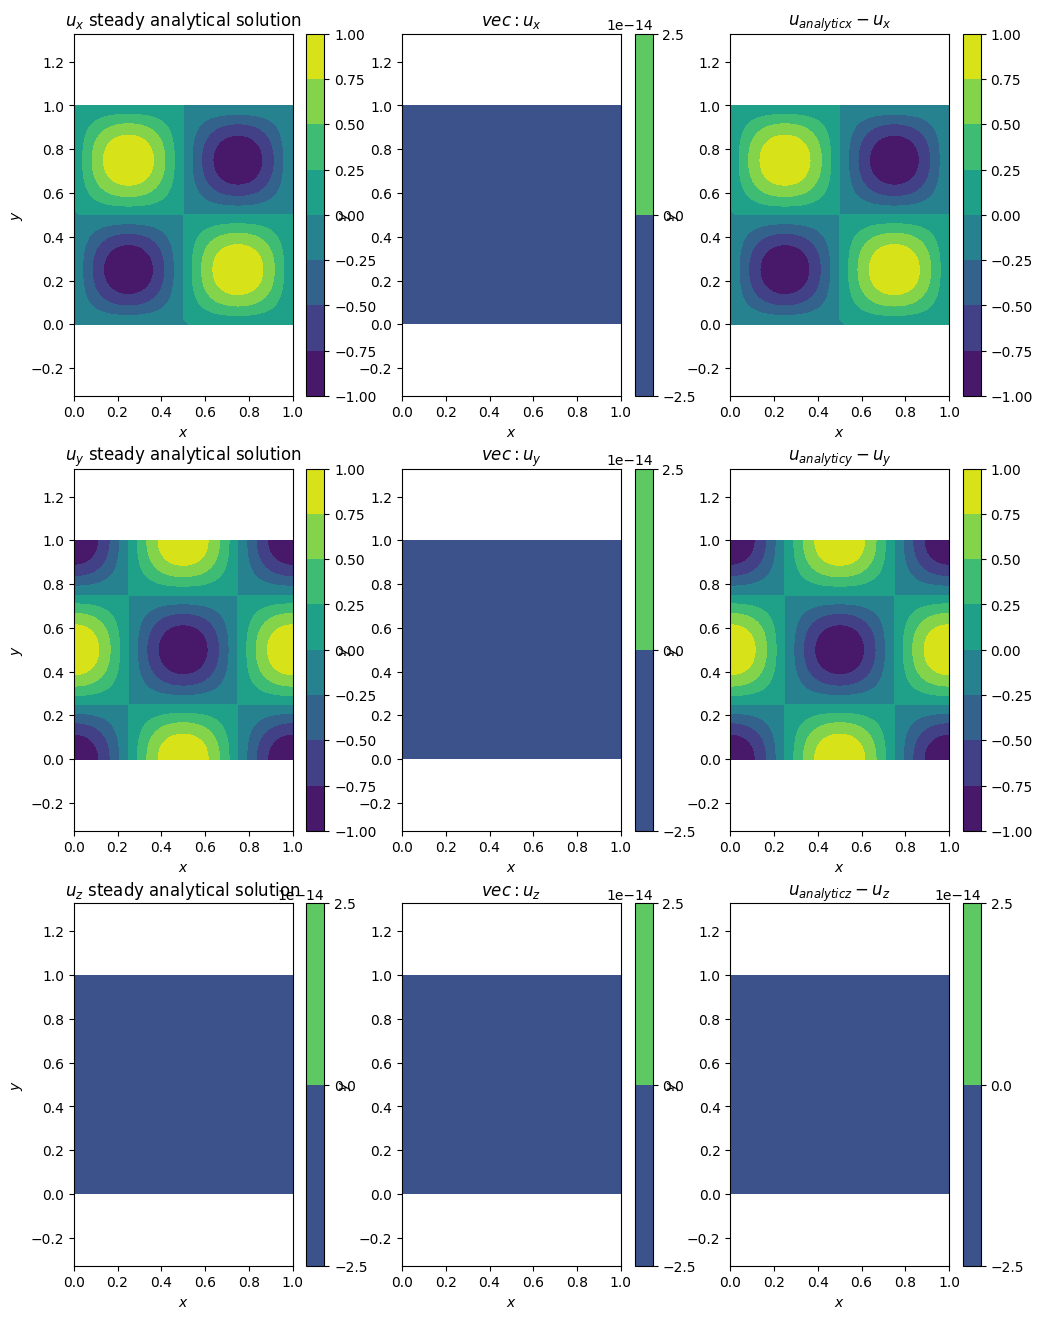

In [29]:
### ion velocity u

plt.figure(figsize=(12, 16))

plt.subplot(3, 3, 1)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], uanalyt[0][:, :, 0])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(f'$u_x$ steady analytical solution')
plt.colorbar()
plt.axis('equal')
plt.subplot(3, 3, 2)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], uone_xyz[0][:, :, 0])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(f'$vec: u_x$')
plt.colorbar()
plt.axis('equal')
plt.subplot(3, 3, 3)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], uanalyt[0][:, :, 0]-uone_xyz[0][:, :, 0])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(r'$u_{analyticx}-u_x$')
plt.colorbar()
plt.axis('equal')

plt.subplot(3, 3, 4)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], uanalyt[1][:, :, 0])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(f'$u_y$ steady analytical solution')
plt.colorbar()
plt.axis('equal')
plt.subplot(3, 3, 5)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], uone_xyz[1][:, :, 0])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(f'$vec: u_y$')
plt.colorbar()
plt.axis('equal')
plt.subplot(3, 3, 6)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], uanalyt[1][:, :, 0]-uone_xyz[1][:, :, 0])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(r'$u_{analyticy}-u_y$')
plt.colorbar()
plt.axis('equal')

plt.subplot(3, 3, 7)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], uanalyt[2][:, :, 0])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(f'$u_z$ steady analytical solution')
plt.colorbar()
plt.axis('equal')
plt.subplot(3, 3, 8)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], uone_xyz[2][:, :, 0])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(f'$vec: u_z$')
plt.colorbar()
plt.axis('equal')
plt.subplot(3, 3, 9)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], uanalyt[2][:, :, 0]-uone_xyz[2][:, :, 0])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(r'$u_{analyticz}-u_z$')
plt.colorbar()
plt.axis('equal')

## Compare manufactured $u_e$ with  $u_e$ generated by fields

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

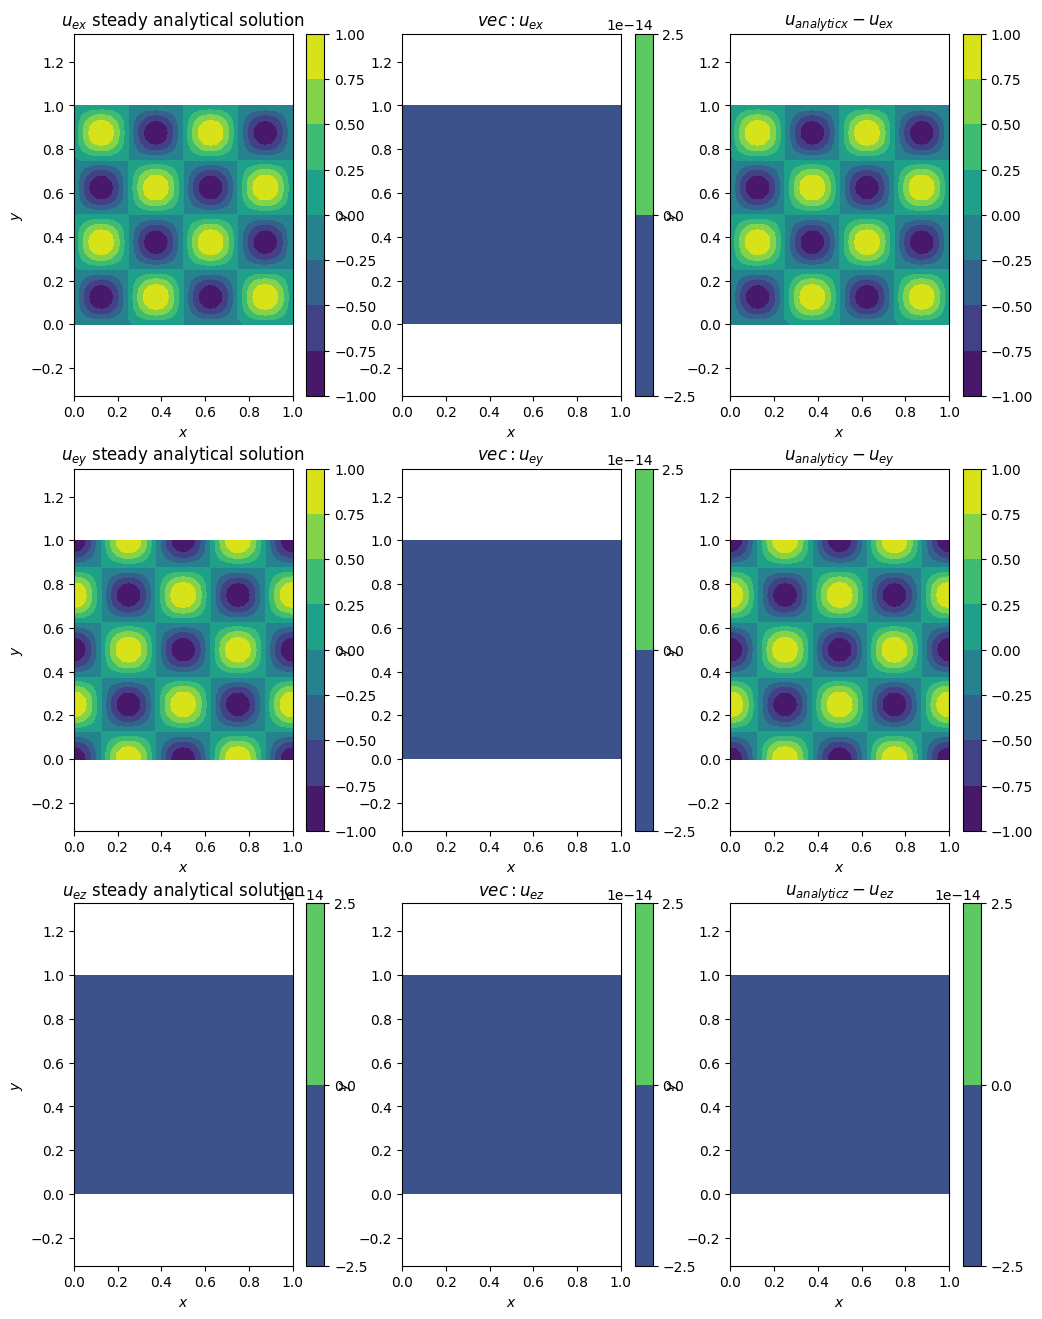

In [30]:
### electron velocity u_e

plt.figure(figsize=(12, 16))

plt.subplot(3, 3, 1)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], u_eanalyt[0][:, :, 0])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(r'$u_{ex}$ steady analytical solution')
plt.colorbar()
plt.axis('equal')
plt.subplot(3, 3, 2)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], utwo_xyz[0][:, :, 0])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(r'$vec: u_{ex}$')
plt.colorbar()
plt.axis('equal')
plt.subplot(3, 3, 3)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], u_eanalyt[0][:, :, 0]-utwo_xyz[0][:, :, 0])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(r'$u_{analyticx}-u_{ex}$')
plt.colorbar()
plt.axis('equal')

plt.subplot(3, 3, 4)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], u_eanalyt[1][:, :, 0])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(r'$u_{ey}$ steady analytical solution')
plt.colorbar()
plt.axis('equal')
plt.subplot(3, 3, 5)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], utwo_xyz[1][:, :, 0])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(r'$vec: u_{ey}$')
plt.colorbar()
plt.axis('equal')
plt.subplot(3, 3, 6)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], u_eanalyt[1][:, :, 0]-utwo_xyz[1][:, :, 0])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(r'$u_{analyticy}-u_{ey}$')
plt.colorbar()
plt.axis('equal')

plt.subplot(3, 3, 7)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], u_eanalyt[2][:, :, 0])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(r'$u_{ez}$ steady analytical solution')
plt.colorbar()
plt.axis('equal')
plt.subplot(3, 3, 8)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], utwo_xyz[2][:, :, 0])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(r'$vec: u_{ez}$')
plt.colorbar()
plt.axis('equal')
plt.subplot(3, 3, 9)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], u_eanalyt[2][:, :, 0]-utwo_xyz[2][:, :, 0])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(r'$u_{analyticz}-u_{ez}$')
plt.colorbar()
plt.axis('equal')

## Compare manufactured potential with potential generated by fields

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

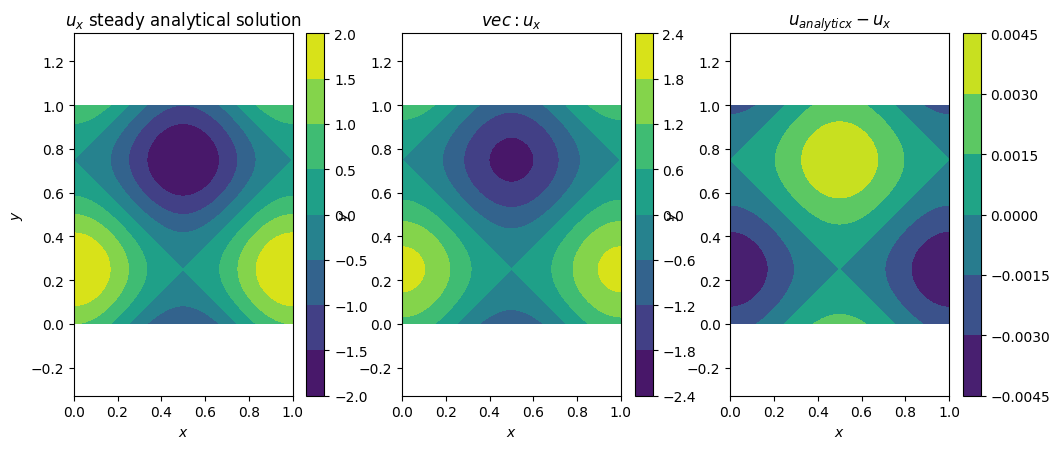

In [31]:
### potential

plt.figure(figsize=(12, 16))

plt.subplot(3, 3, 1)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], potential_analytical[0][:, :, 0])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(f'$u_x$ steady analytical solution')
plt.colorbar()
plt.axis('equal')
plt.subplot(3, 3, 2)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], potential_xyz[:, :, 0])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(f'$vec: u_x$')
plt.colorbar()
plt.axis('equal')
plt.subplot(3, 3, 3)
plt.contourf(x_grid[:, :, 0], y_grid[:, :, 0], potential_analytical[0][:, :, 0]-potential_xyz[:, :, 0])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(r'$u_{analyticx}-u_x$')
plt.colorbar()
plt.axis('equal')